In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/data_clean.csv')
df.head()

kw  rank  \
0  how to finish concrete     1   
1  how to finish concrete     4   
2  how to finish concrete     5   
3  how to finish concrete     6   
4  how to finish concrete     7   

                                                link  success  word_count  \
0  https://www.familyhandyman.com/project/how-to-...     True      1689.0   
1            https://www.wikihow.com/Finish-Concrete     True       324.0   
2  https://www.instructables.com/How-to-Finish-Co...     True      1417.0   
3  https://carrollsbuildingmaterials.com/diy-conc...     True      1600.0   
4  https://www.hunker.com/13402242/how-to-finish-...     True       738.0   

   percent_human  percent_ai  
0      99.926081    0.073917  
1      88.443929   11.556073  
2      94.222470    5.777531  
3      99.730074    0.269922  
4      97.359934    2.640062

In [4]:
def multiplot(df):
    # define subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    #fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), gridspec_kw={'hspace': 0.2, 'wspace': 0.1})
    # Q-Q plot
    st.probplot(df['percent_human'], dist='norm', plot=axs[0, 0])
    axs[0, 0].set_title('Figure 1: Q-Q Plot of Percent Human')
    axs[0, 0].set_xlabel('Theoretical quantiles')
    axs[0, 0].set_ylabel('Sample quantiles')
    axs[0, 0].text(0.02, 0.95, 'Data is not normally distributed\nand cannot be evaluated using Pearson\'s method', transform=axs[0, 0].transAxes, fontsize=12, verticalalignment='top', color='black')

    # Histogram
    skewness = round(st.skew(df['percent_human']),2)
    sns.histplot(data=df['percent_human'], kde=False, binwidth=1, color='green', ax=axs[0, 1])
    axs[0, 1].set_title('Figure 2: Histogram of Percent Human')
    axs[0, 1].set_xlabel('Percent Human')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_xlim(0, None)
    axs[0, 1].set_ylim(0, None)
    axs[0, 1].text(0.02, 0.95, f'Data has high Skewness ({skewness})', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')
    axs[0, 1].text(0.02, 0.90, f'Over 1/3 of data in top 2%', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')


    # Scatter plot of percent_human vs rank
    sns.scatterplot(data=df, x='rank', y='percent_human', color='green', alpha=0.05, s=200, edgecolor=None, ax=axs[1, 0])
    axs[1, 0].set_title('Figure 3: Scatter Plot of Percent Human vs Rank')
    axs[1, 0].set_xlabel('Rank')
    axs[1, 0].set_ylabel('Percent Human')
    axs[1, 0].set_xticks(np.arange(1, 21))

    # Scatter plot of mean percent_human vs. rank
    grouped_data = df.groupby('rank')
    mean_percent_human = grouped_data['percent_human'].mean().reset_index()
    sns.scatterplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human',  color='green')
    sns.regplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human', color='green', scatter=False, line_kws={'linestyle':'--'})
    axs[1, 1].set_title('Figure 4: Scatter Plot of Mean Percent Human vs Rank')
    axs[1, 1].set_xlabel('Rank')
    axs[1, 1].set_ylabel('Mean Percent Human')
    axs[1, 1].set_xticks(np.arange(1, 21))
    axs[1, 1].legend(handles=axs[1, 1].lines[::len(mean_percent_human)], labels=['Best fit line'])
    axs[1, 1].text(0.02, 0.05, f'Percent Human is weakly correlated to Rank with a high degree of certainty', transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top', color='black')


    # Calculate correlation coefficients and p-values
    pb_corr, pb_pval = st.pointbiserialr(df['rank'], df['percent_human'])
    spearman_corr, spearman_pval = st.spearmanr(df['rank'], df['percent_human'])
    kendall_tau, kendall_pval = st.kendalltau(df['rank'], df['percent_human'])

    # Create a dictionary to store the results
    corr = {
        'Method': ['Point Biserial', 'Spearman', 'Kendall'],
        'Correlation Coefficient': [pb_corr, spearman_corr, kendall_tau],
        'P-value': [pb_pval, spearman_pval, kendall_pval]
    }

    for key in corr:
        if isinstance(corr[key][0], float):
            corr[key] = [round(val, 4) for val in corr[key]]


    # Create a pandas dataframe from the dictionary
    df_corr = pd.DataFrame(corr)

    # Create a table to display the correlation coefficients and p-values
    col_labels = ['Method', 'Corr Coef', 'P-value']
    table_data = [col_labels] + df_corr.values.tolist()

    table = axs[1, 1].table(cellText=table_data,
                    colLabels=None,
                    cellLoc='center',
                    bbox=[0.02, 0.08, 0.5, 0.15])  # x, y, width, height
    table.set_fontsize(10)

    # Format the table to use 4 significant figures
    for i in range(1, len(table_data)):
        for j in range(1, 3):
            cell = table.get_celld()[i, j]
            cell_text = cell.get_text().get_text()
            cell_text = float(cell_text)
            cell_text = f'{cell_text:.4g}'
            cell.get_text().set_text(cell_text)

    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    fig.savefig('figures/Fig_1-4.png')
    plt.show()

In [56]:
def multiplot2(df):
    # define subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    #fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), gridspec_kw={'hspace': 0.2, 'wspace': 0.1})

    # Main Title
    fig.suptitle(f'Correlation Study: Rank vs Percent Human ({len(df)} data points)', fontsize=16, fontweight='bold')
    
    # Fig 1: Q-Q plot [0, 0]
    st.probplot(df['percent_human'], dist='norm', plot=axs[0, 0])
    axs[0, 0].set_title('Figure 1: Q-Q Plot of Percent Human')
    axs[0, 0].set_xlabel('Theoretical quantiles')
    axs[0, 0].set_ylabel('Sample quantiles')
    axs[0, 0].text(0.02, 0.95, 'Data is not normally distributed\nand cannot be evaluated using Pearson\'s method', transform=axs[0, 0].transAxes, fontsize=12, verticalalignment='top', color='black')

    
    # Fig 2: Histogram [0, 1]
    sns.histplot(data=df['percent_human'], kde=False, binwidth=1, color='green', ax=axs[0, 1])
    axs[0, 1].set_title('Figure 2: Histogram of Percent Human')
    axs[0, 1].set_xlabel('Percent Human')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_xlim(-5, 105)
    axs[0, 1].set_ylim(0, None)
    skewness = round(st.skew(df['percent_human']),2)
    axs[0, 1].text(0.02, 0.95, f'Data Skewness {skewness}', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')
    #axs[0, 1].text(0.02, 0.90, f'Over 1/3 of data in top 2%', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')

    
    # Fig 3: Violin plot [1, 0]
    sns.violinplot(ax=axs[1, 0], data=df, x="rank", y="percent_human", scale="count", inner="box", color="#00aa00", saturation=0.5, cut=0, linewidth=.9)#, edgecolor='#ffffff')

        # plot mean lines
    for i, mean in enumerate(df.groupby("rank")["percent_human"].mean()):
        axs[1, 0].hlines(mean, i-0.25, i+0.25, linewidth=1, color='#444444', zorder=100)

        # plot median markers
    median_markers = df.groupby('rank')['percent_human'].median()
    sns.scatterplot(ax=axs[1, 0], x=median_markers.index-1, y=median_markers.values, marker='o', s=20, color='white', edgecolor='black', zorder=100)
    
    axs[1, 0].set_title('Fig 3:Percent Human vs Rank')
    #axs[1, 0].set_facecolor('#ffffff')
    axs[1, 0].set_xlabel("Rank",size = 16,alpha=0.7)
    axs[1, 0].set_ylabel("Percent Human",size = 16,alpha=0.7)

   
    # Fig 4: Scatter plot [1, 1]
    grouped_data = df.groupby('rank')
    mean_percent_human = grouped_data['percent_human'].mean().reset_index()
    sns.scatterplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human',  color='green')
    sns.regplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human', color='green', scatter=False, line_kws={'linestyle':'--'})
    axs[1, 1].set_title('Figure 4: Scatter Plot of Mean Percent Human vs Rank')
    axs[1, 1].set_xlabel('Rank')
    axs[1, 1].set_ylabel('Mean Percent Human')
    axs[1, 1].set_xticks(np.arange(1, 21))
    axs[1, 1].legend(handles=axs[1, 1].lines[::len(mean_percent_human)], labels=['Best fit line'])
    axs[1, 1].text(0.02, 0.05, f'Percent Human is weakly correlated to Rank with a high degree of certainty', transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top', color='black')

        # Calculate correlation coefficients and p-values
    pb_corr, pb_pval = st.pointbiserialr(df['rank'], df['percent_human'])
    spearman_corr, spearman_pval = st.spearmanr(df['rank'], df['percent_human'])
    kendall_tau, kendall_pval = st.kendalltau(df['rank'], df['percent_human'])

        # Create a dictionary to store the results
    corr = {
        'Method': ['Point Biserial', 'Spearman', 'Kendall'],
        'Correlation Coefficient': [pb_corr, spearman_corr, kendall_tau],
        'P-value': [pb_pval, spearman_pval, kendall_pval]
    }

        # Create a pandas dataframe from the corr dict
    df_corr = pd.DataFrame(corr)

        # Create a table to display the correlation coefficients and p-values
    col_labels = ['Method', 'Corr Coef', 'P-value']
    table_data = [col_labels] + df_corr.values.tolist()

    table = axs[1, 1].table(cellText=table_data,
                    colLabels=None,
                    cellLoc='center',
                    bbox=[0.02, 0.08, 0.5, 0.15])  # x, y, width, height
    table.set_fontsize(10)

        # Format the table to use 4 significant figures
    for i in range(1, len(table_data)):
        for j in range(1, 3):
            cell = table.get_celld()[i, j]
            cell_text = cell.get_text().get_text()
            cell_text = float(cell_text)
            cell_text = f'{cell_text:.4g}'
            cell.get_text().set_text(cell_text)

    # shrink outer margin
    fig.subplots_adjust(left=0.05, right=0.95, top=.90, bottom=0.05)
   
    fig.savefig('figures/Fig_1-4.png')
    plt.show()

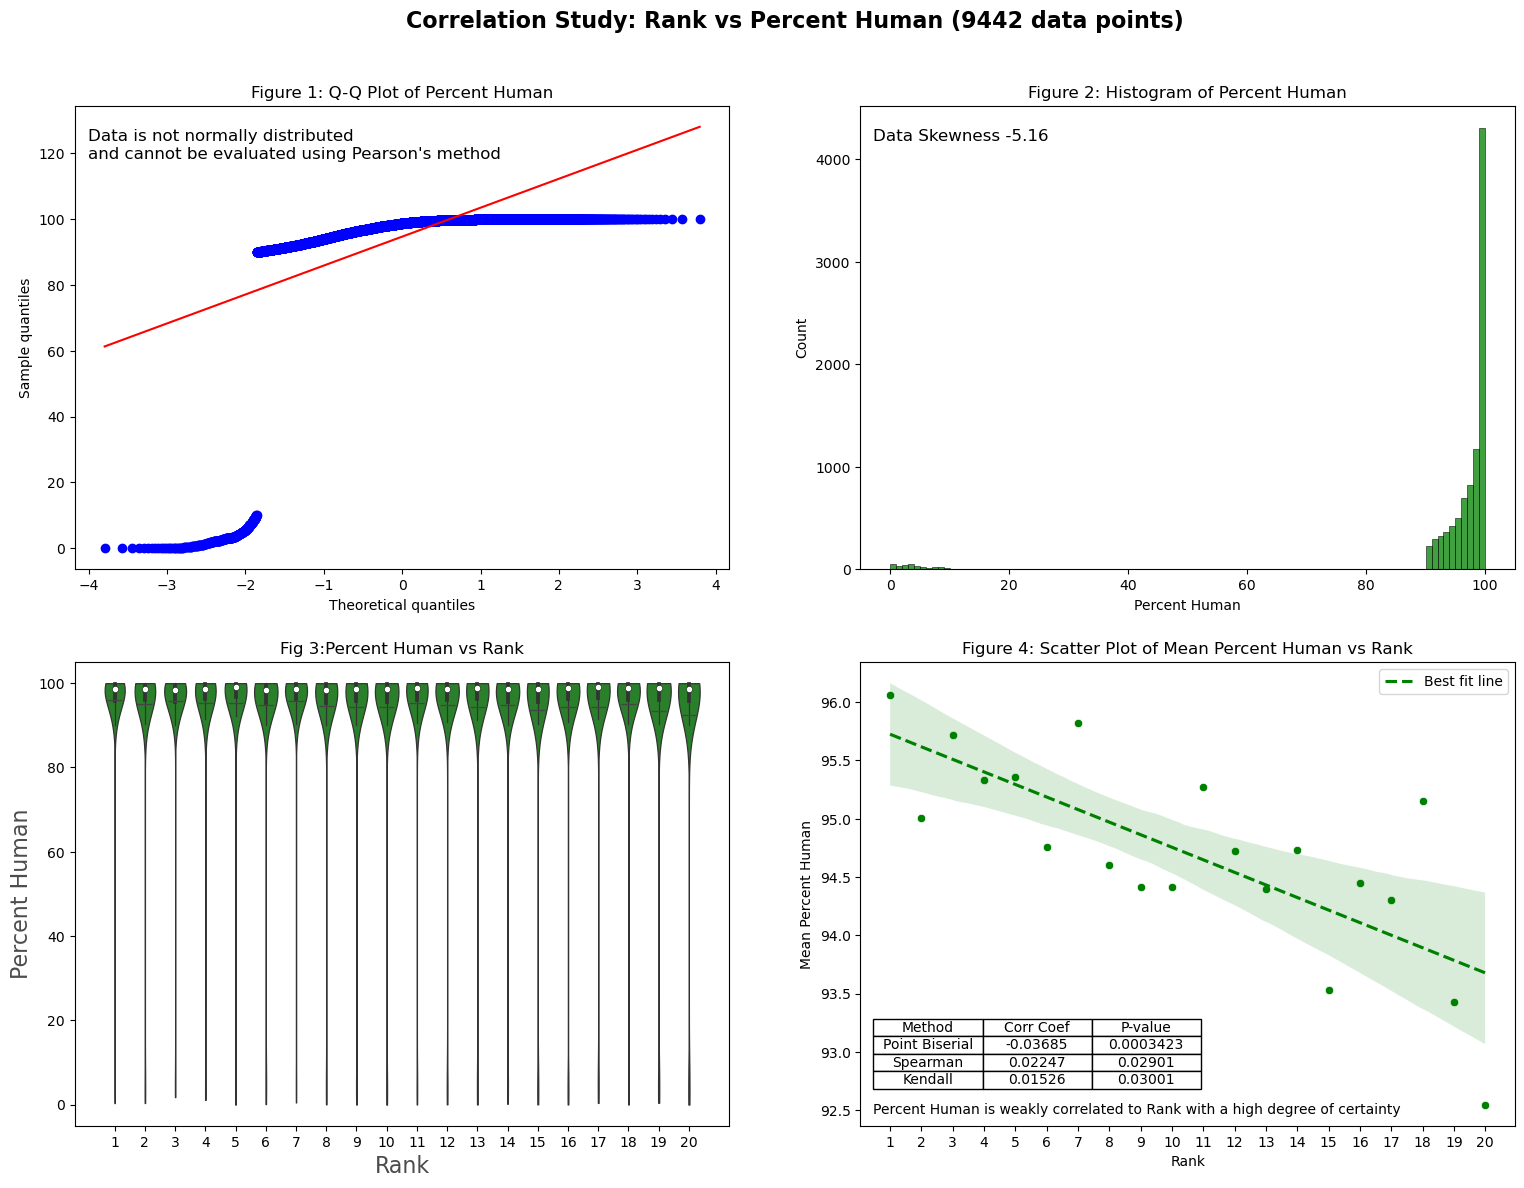

In [57]:
df_90_10 = df[(df['percent_human'] >= 90) | (df['percent_human'] <= 10)]
multiplot2(df_90_10)

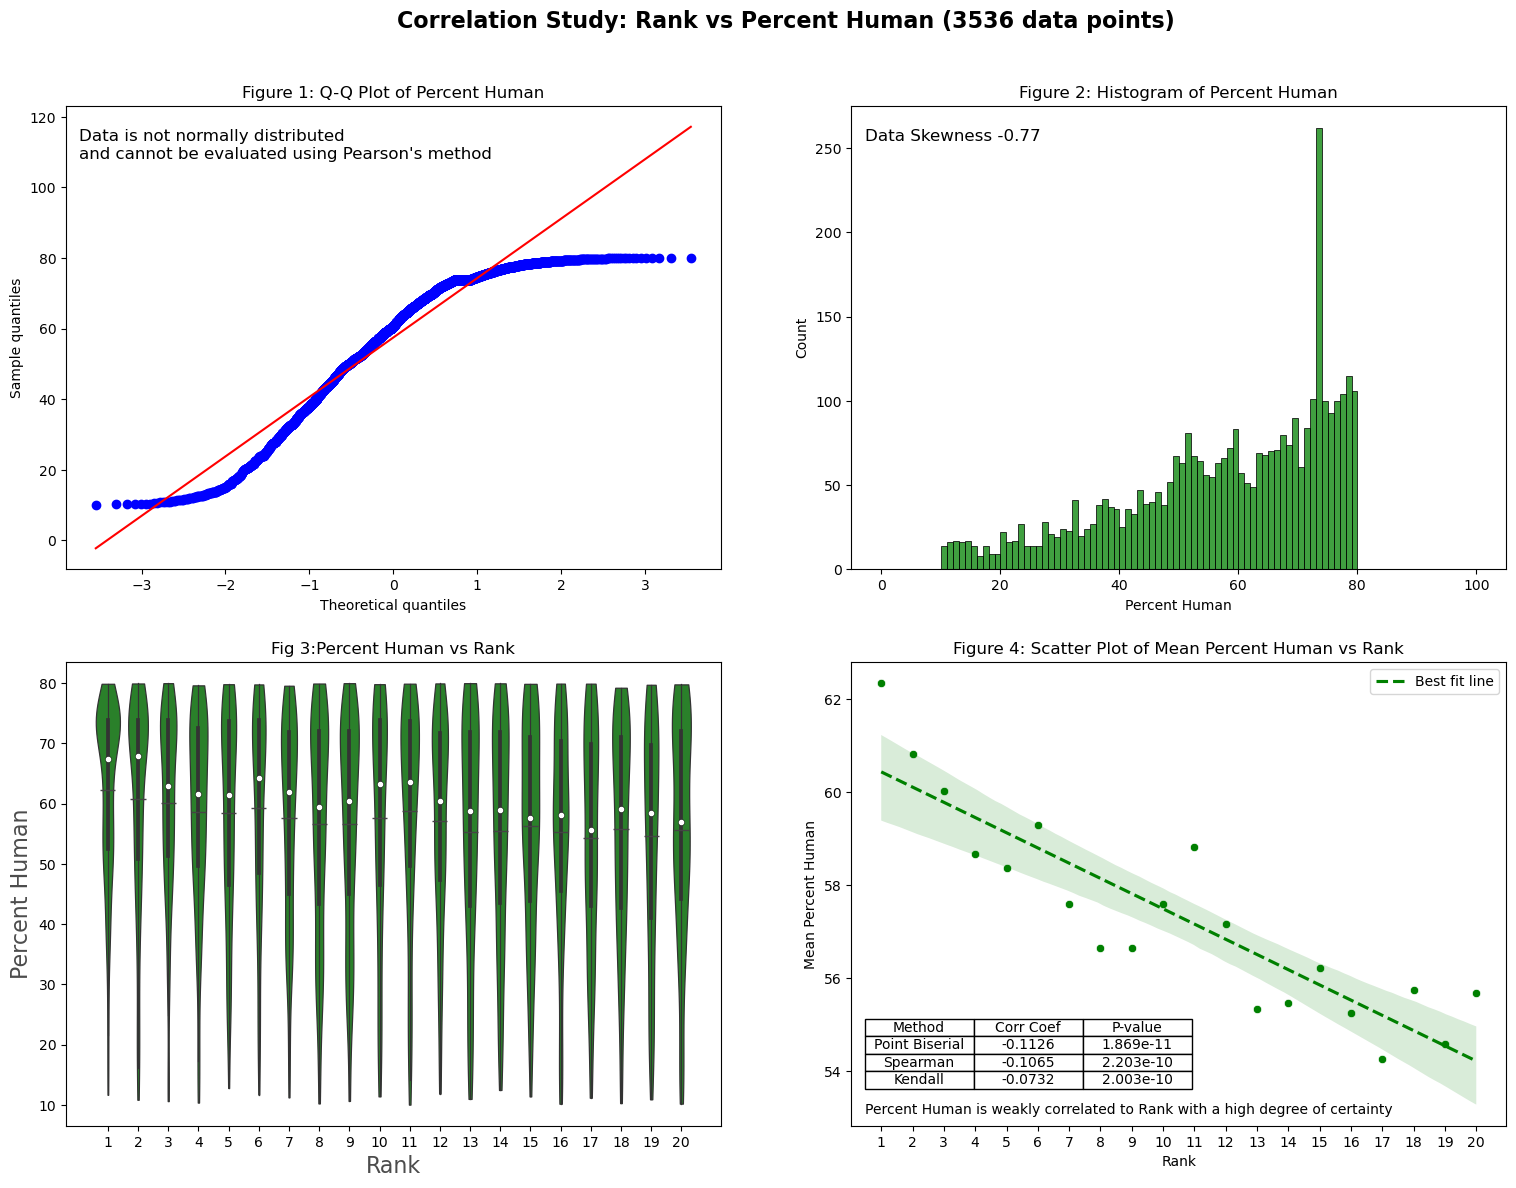

In [58]:
df_mid_80 = df[(df['percent_human'] < 80) & (df['percent_human'] > 10)]
multiplot2(df_mid_80)

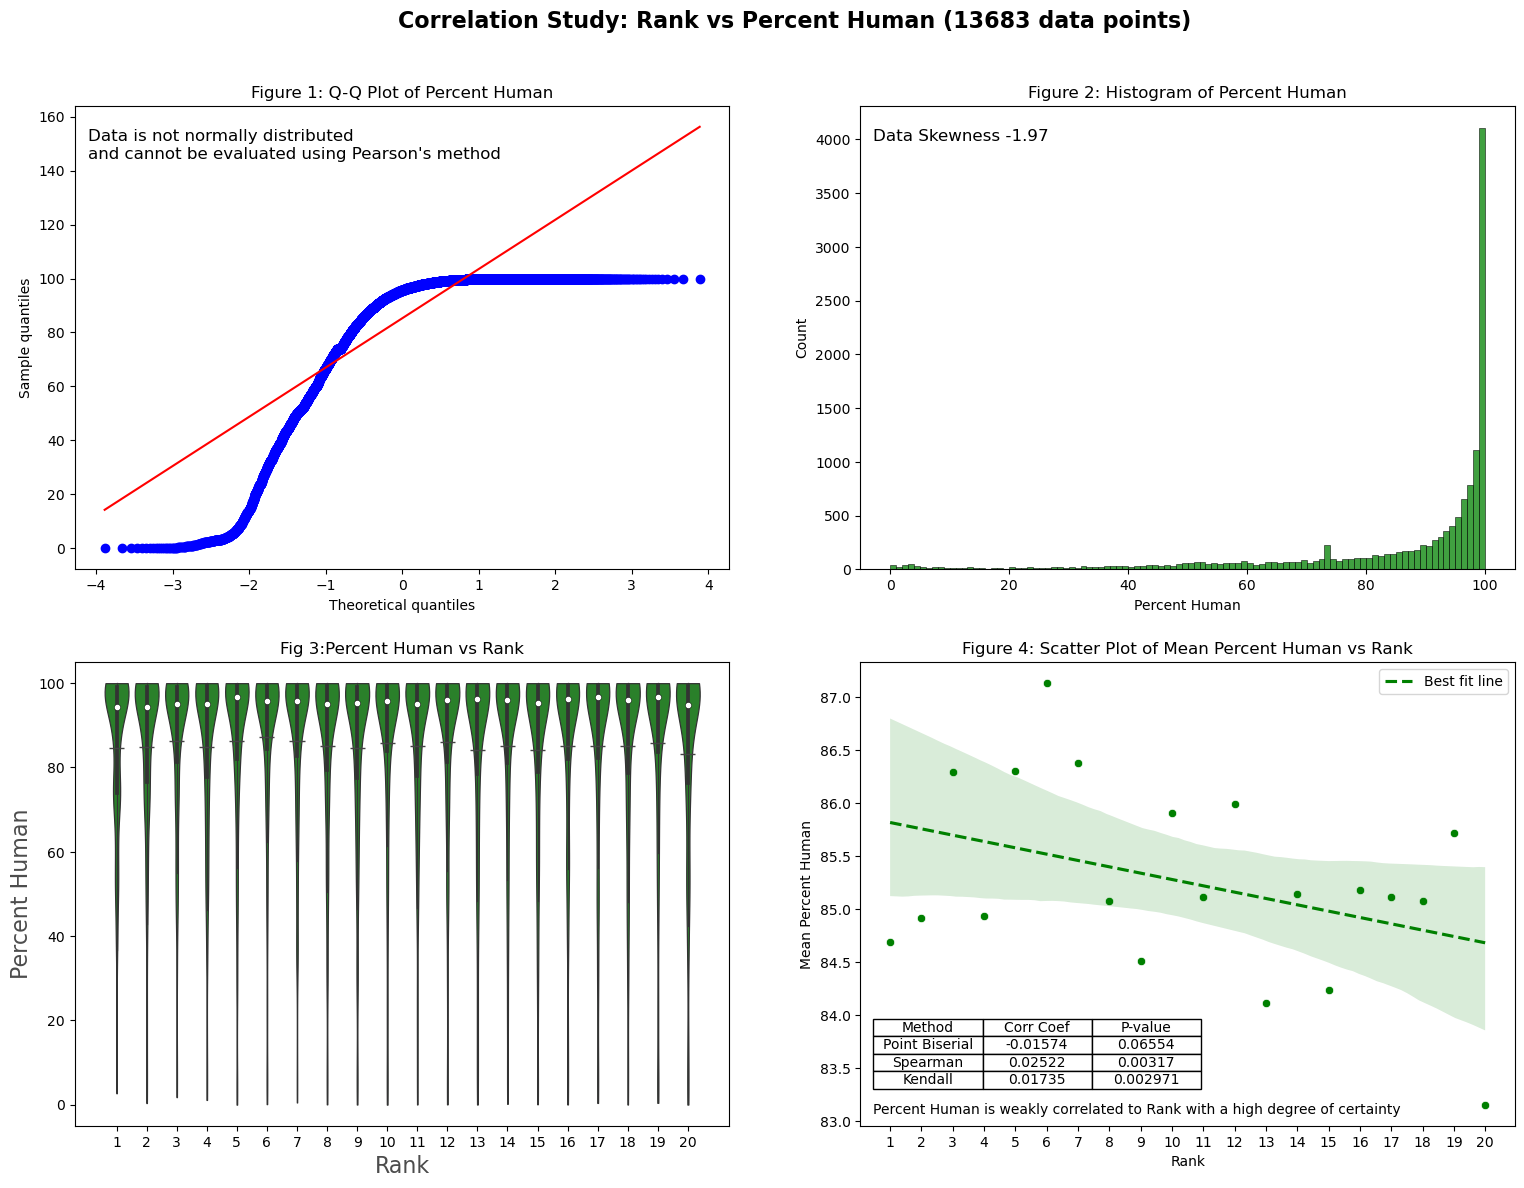

In [36]:
df_10_ky = df.groupby('kw').filter(lambda x: len(x) >= 10)
multiplot2(df_10_ky)

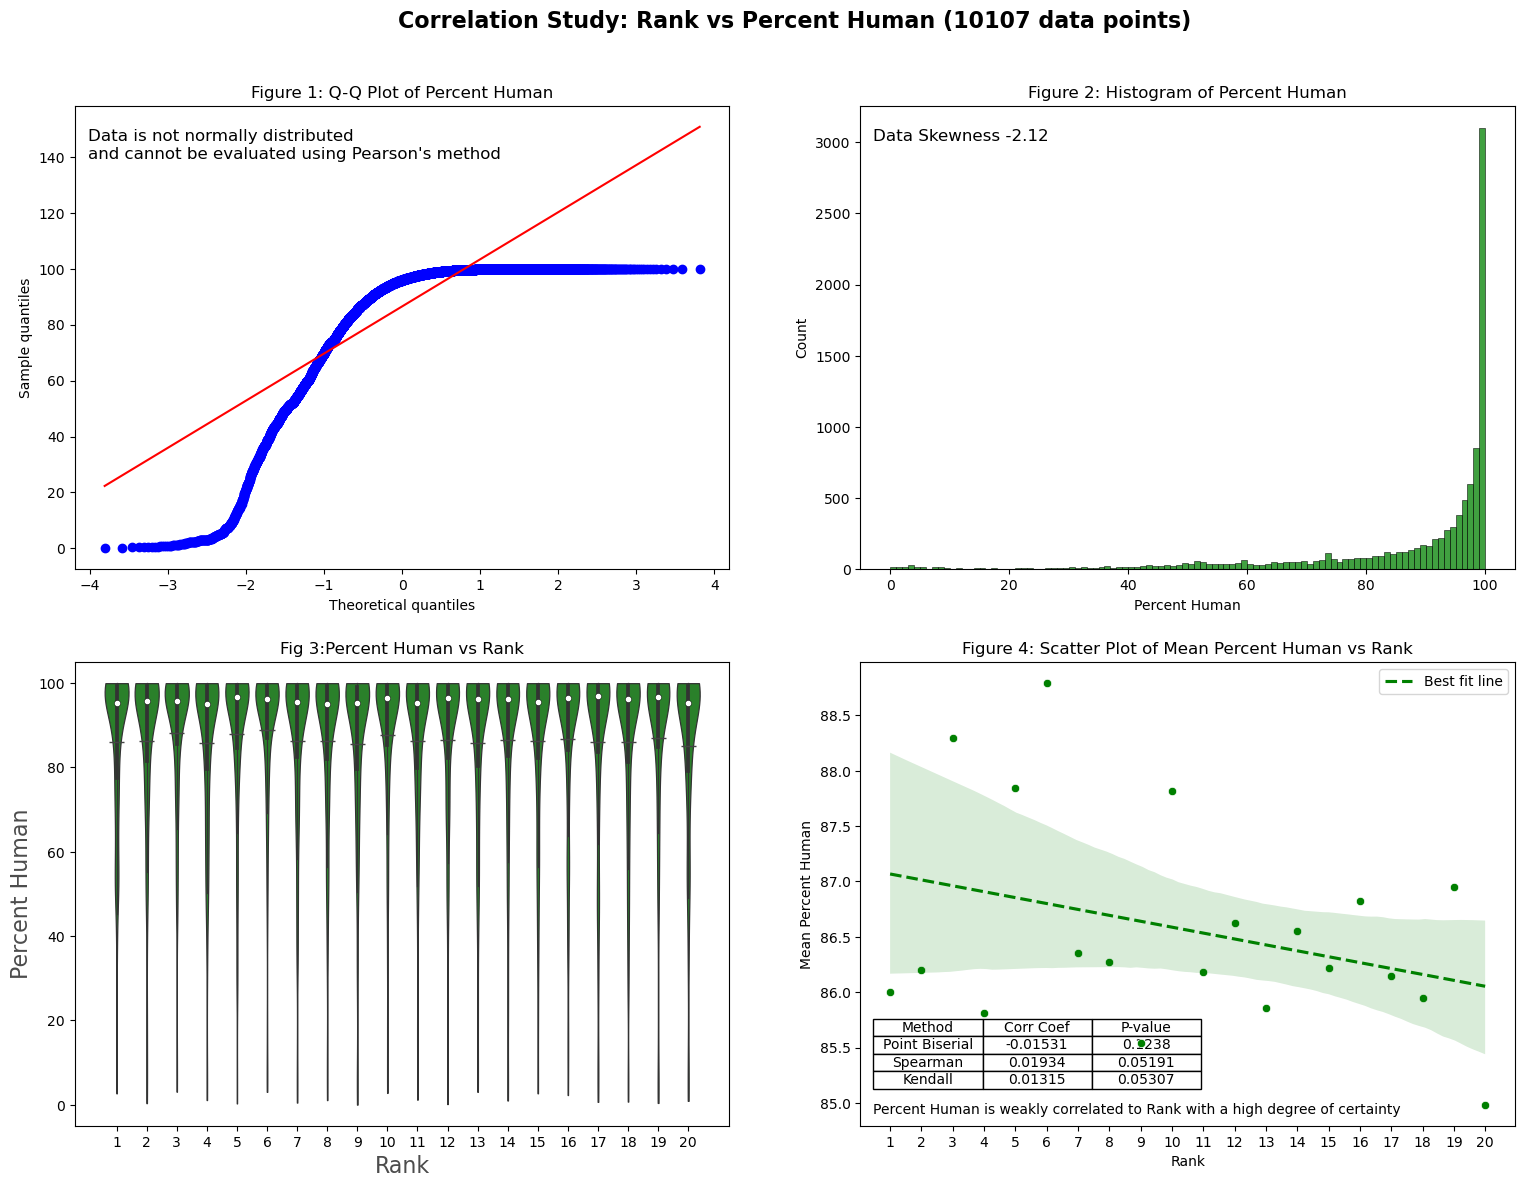

In [37]:
df_15_ky = df.groupby('kw').filter(lambda x: len(x) >= 15)
multiplot2(df_15_ky)

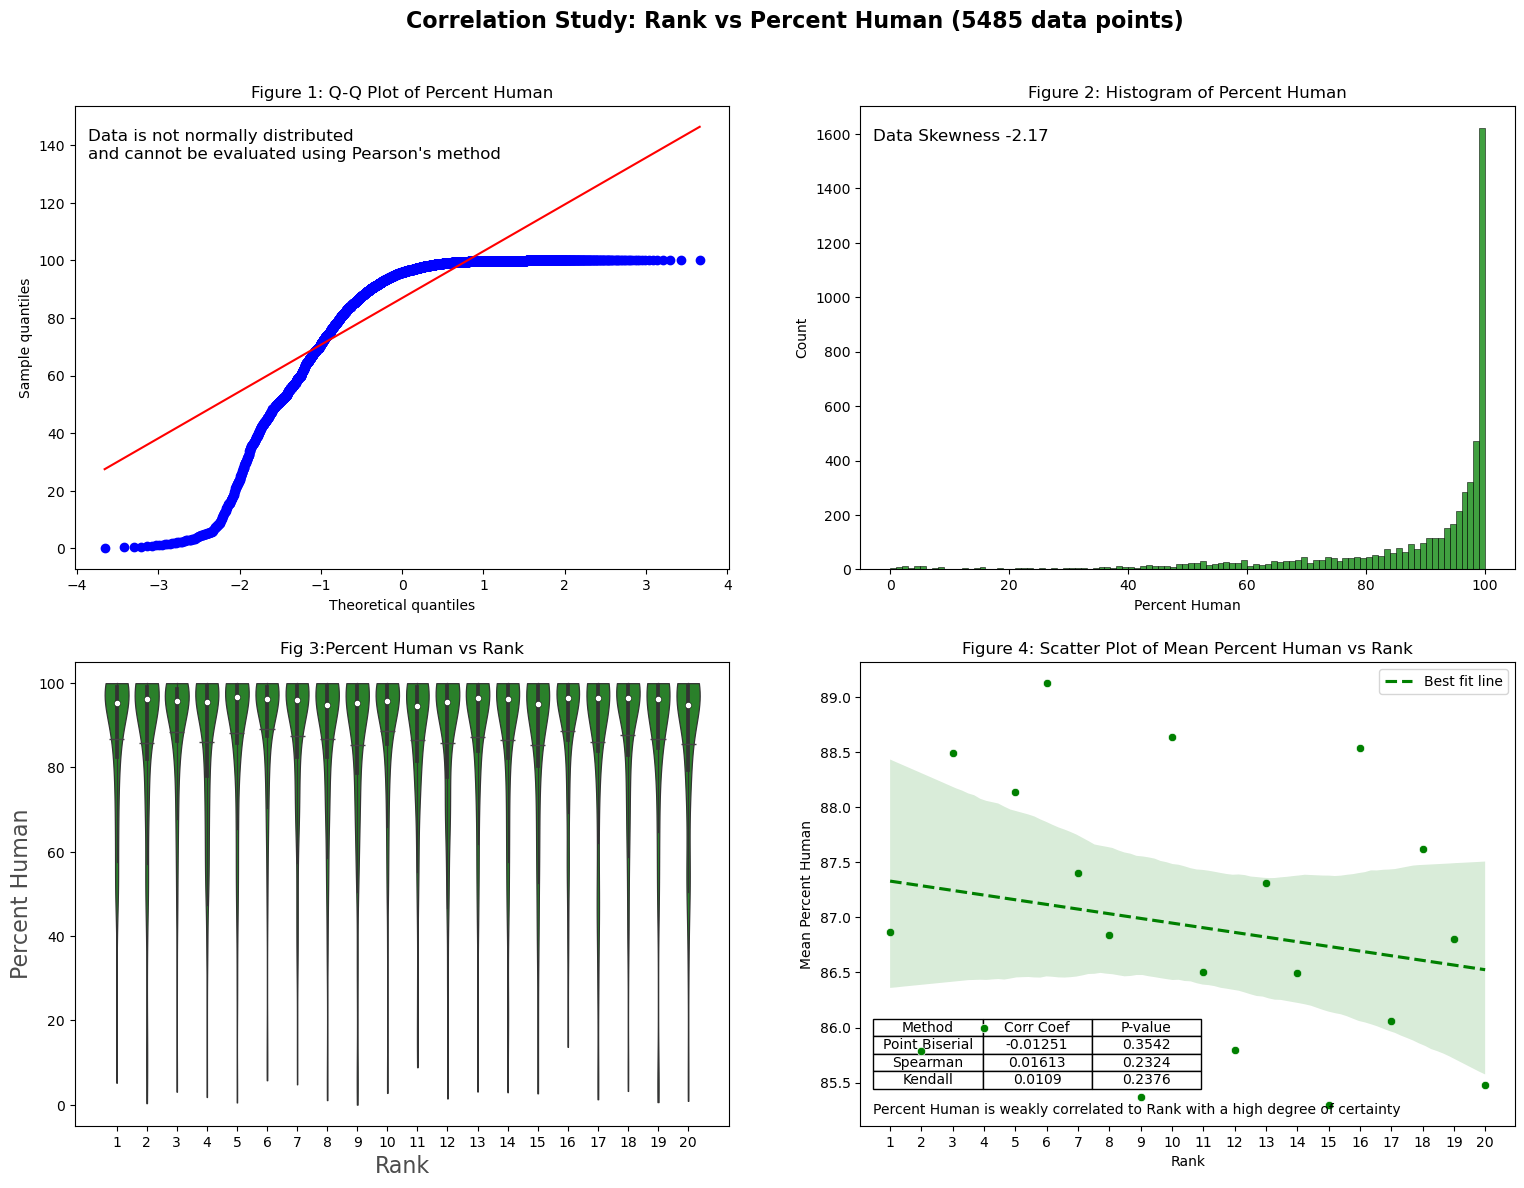

In [38]:
df_18_ky = df.groupby('kw').filter(lambda x: len(x) >= 18)
multiplot2(df_18_ky)

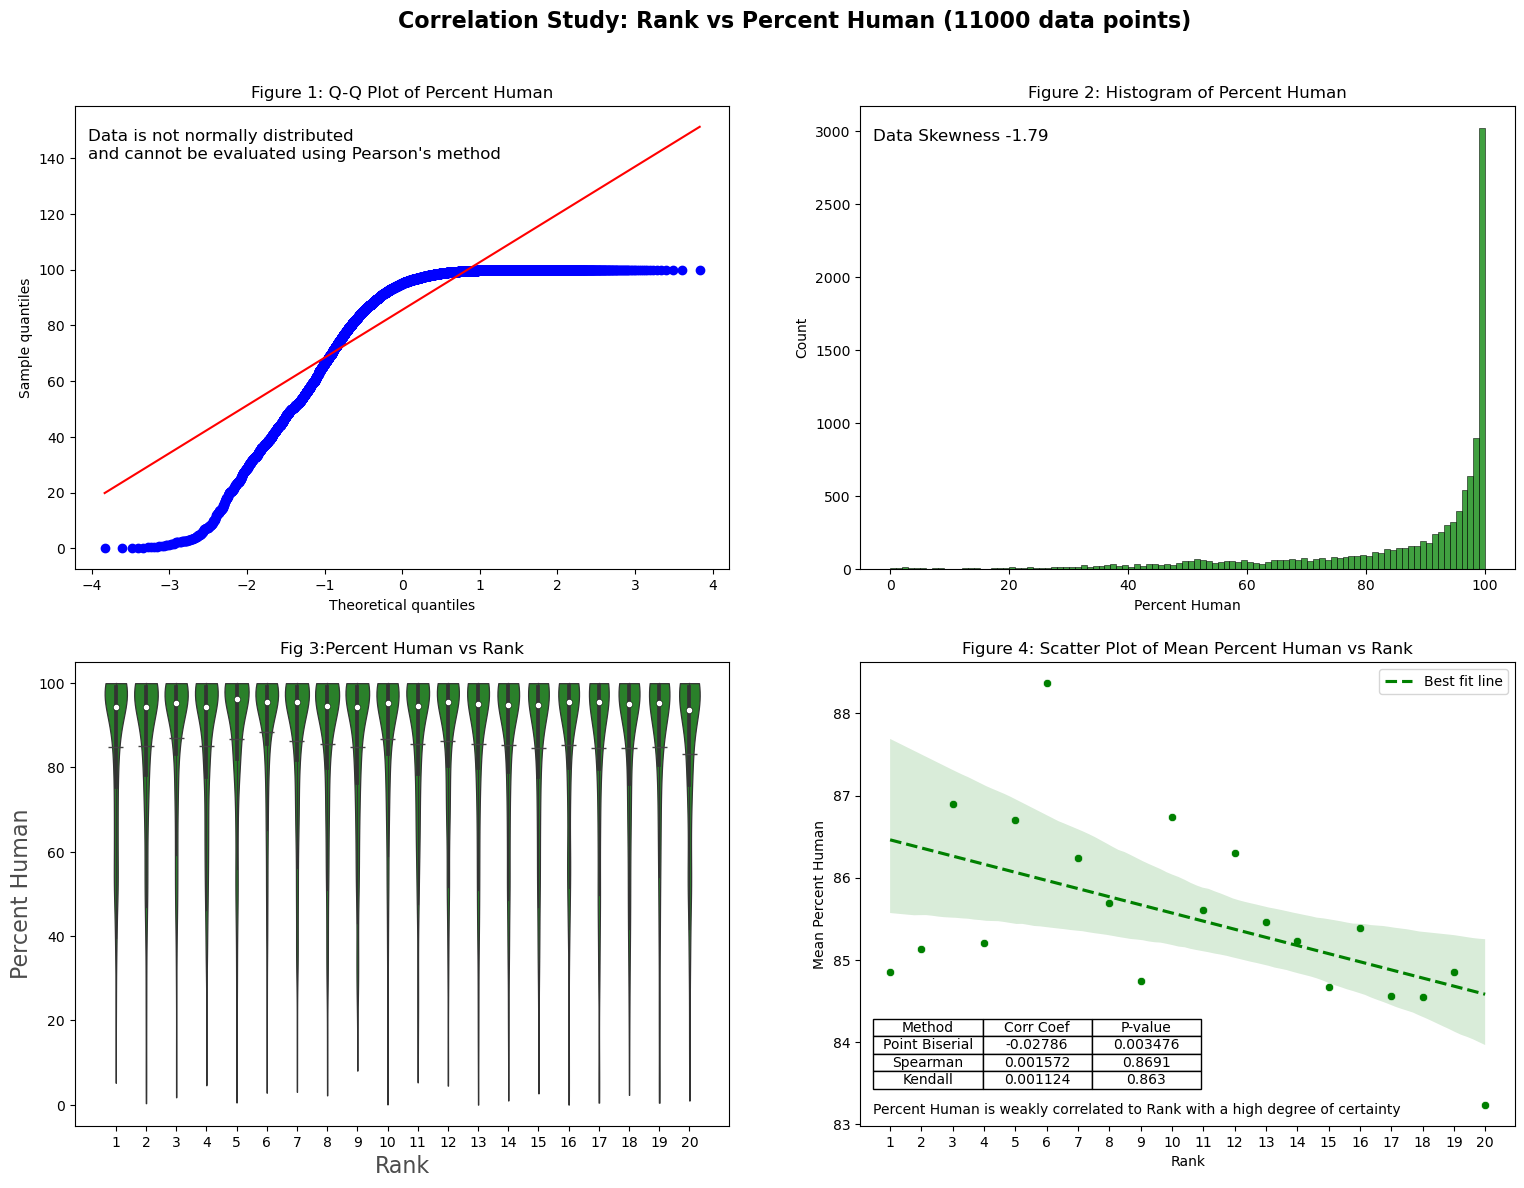

In [39]:
df_wc_500 = df[df['word_count']>= 500]
multiplot2(df_wc_500)

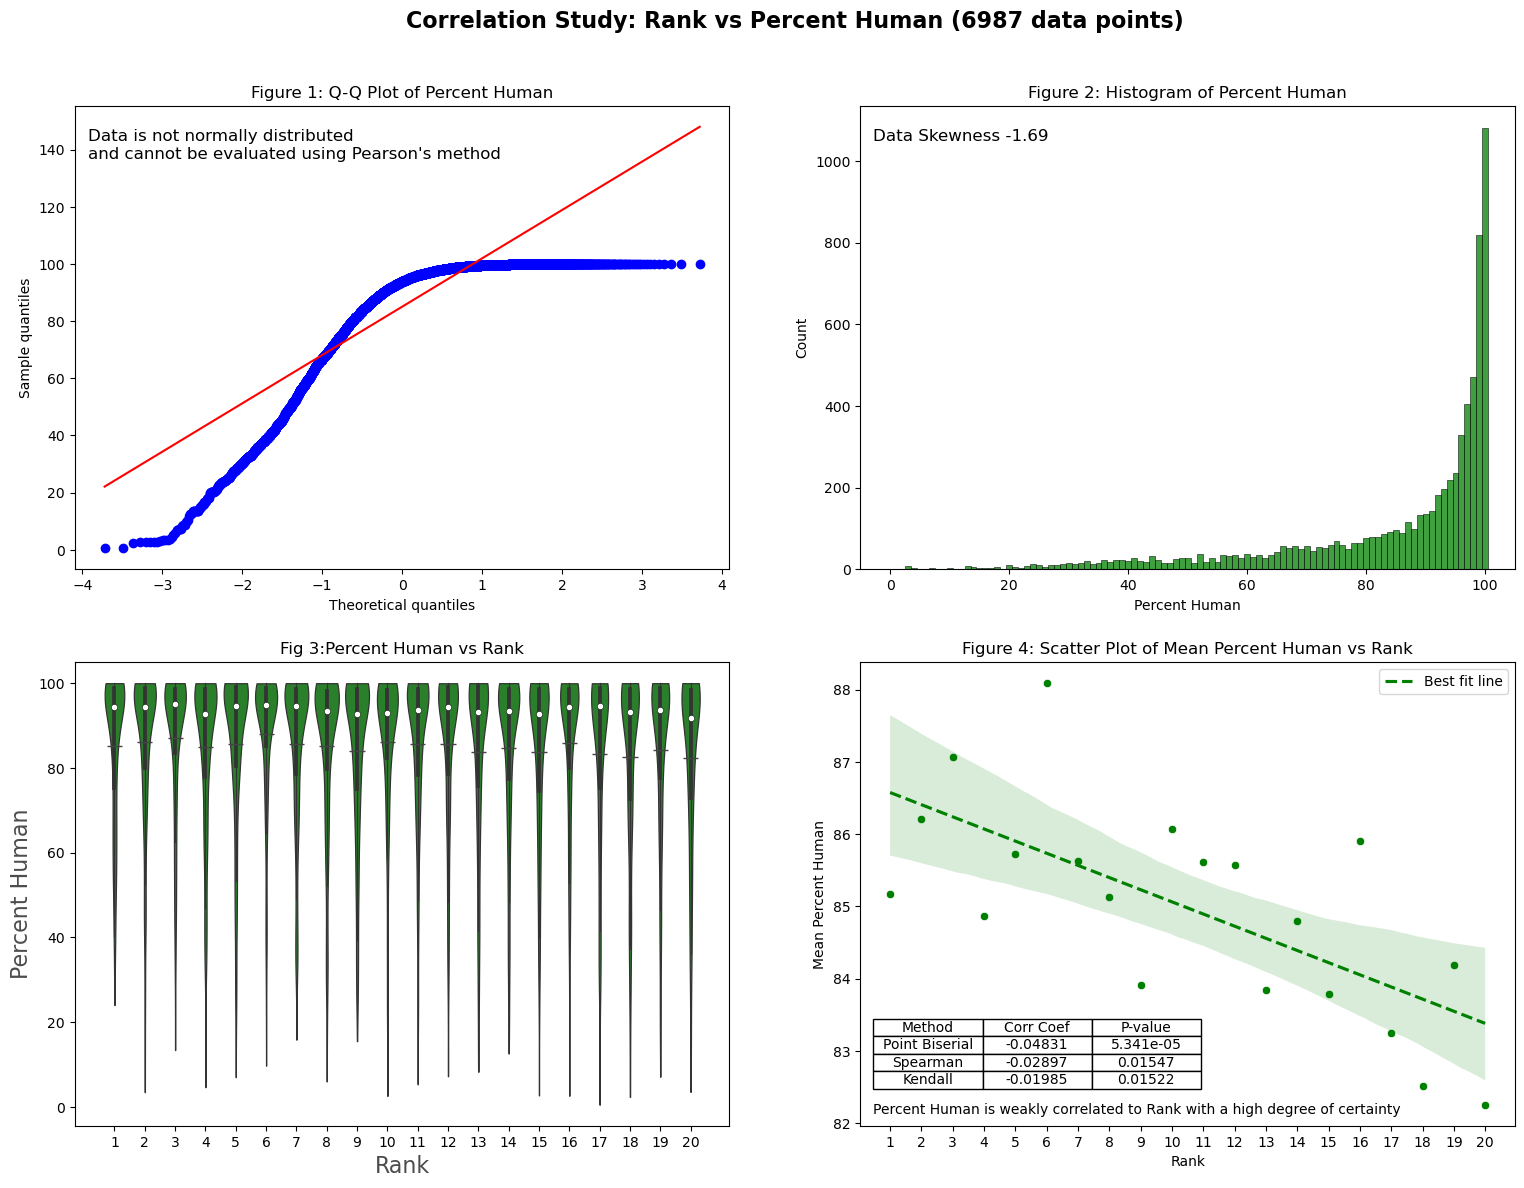

In [40]:
df_wc_1000 = df[df['word_count']>= 1000]
multiplot2(df_wc_1000)

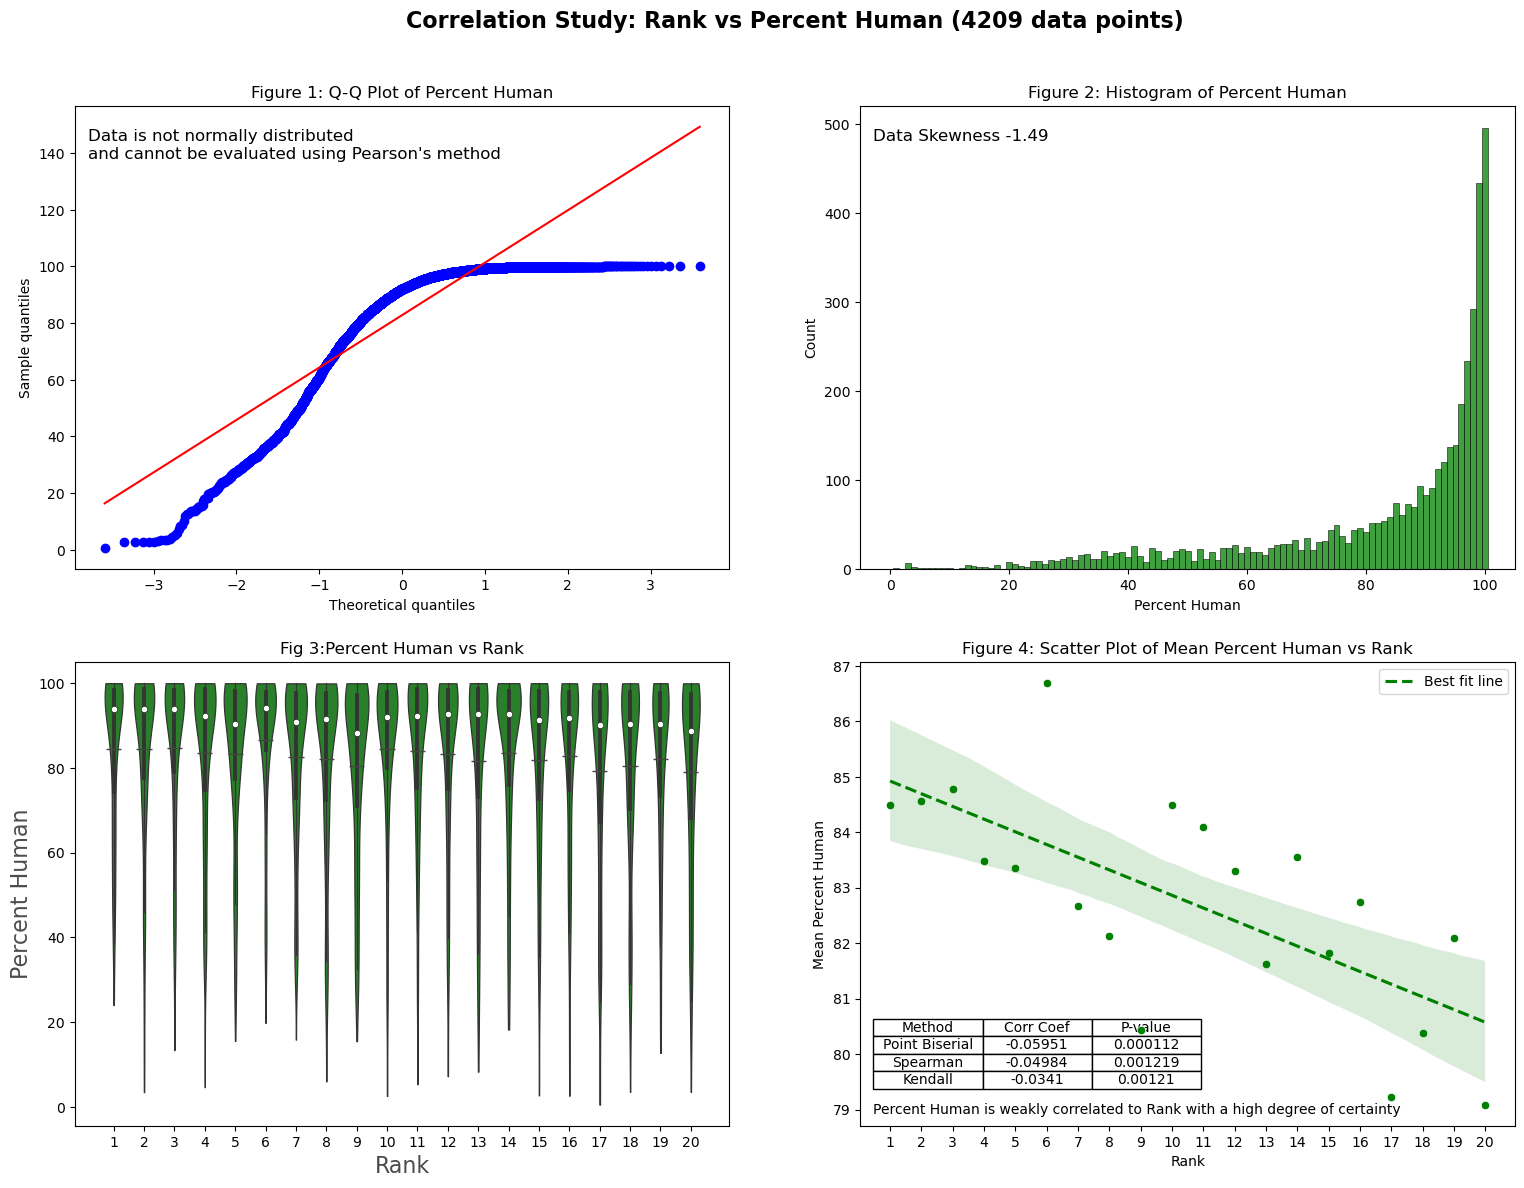

In [41]:
df_wc_1500 = df[df['word_count']>= 1500]
multiplot2(df_wc_1500)

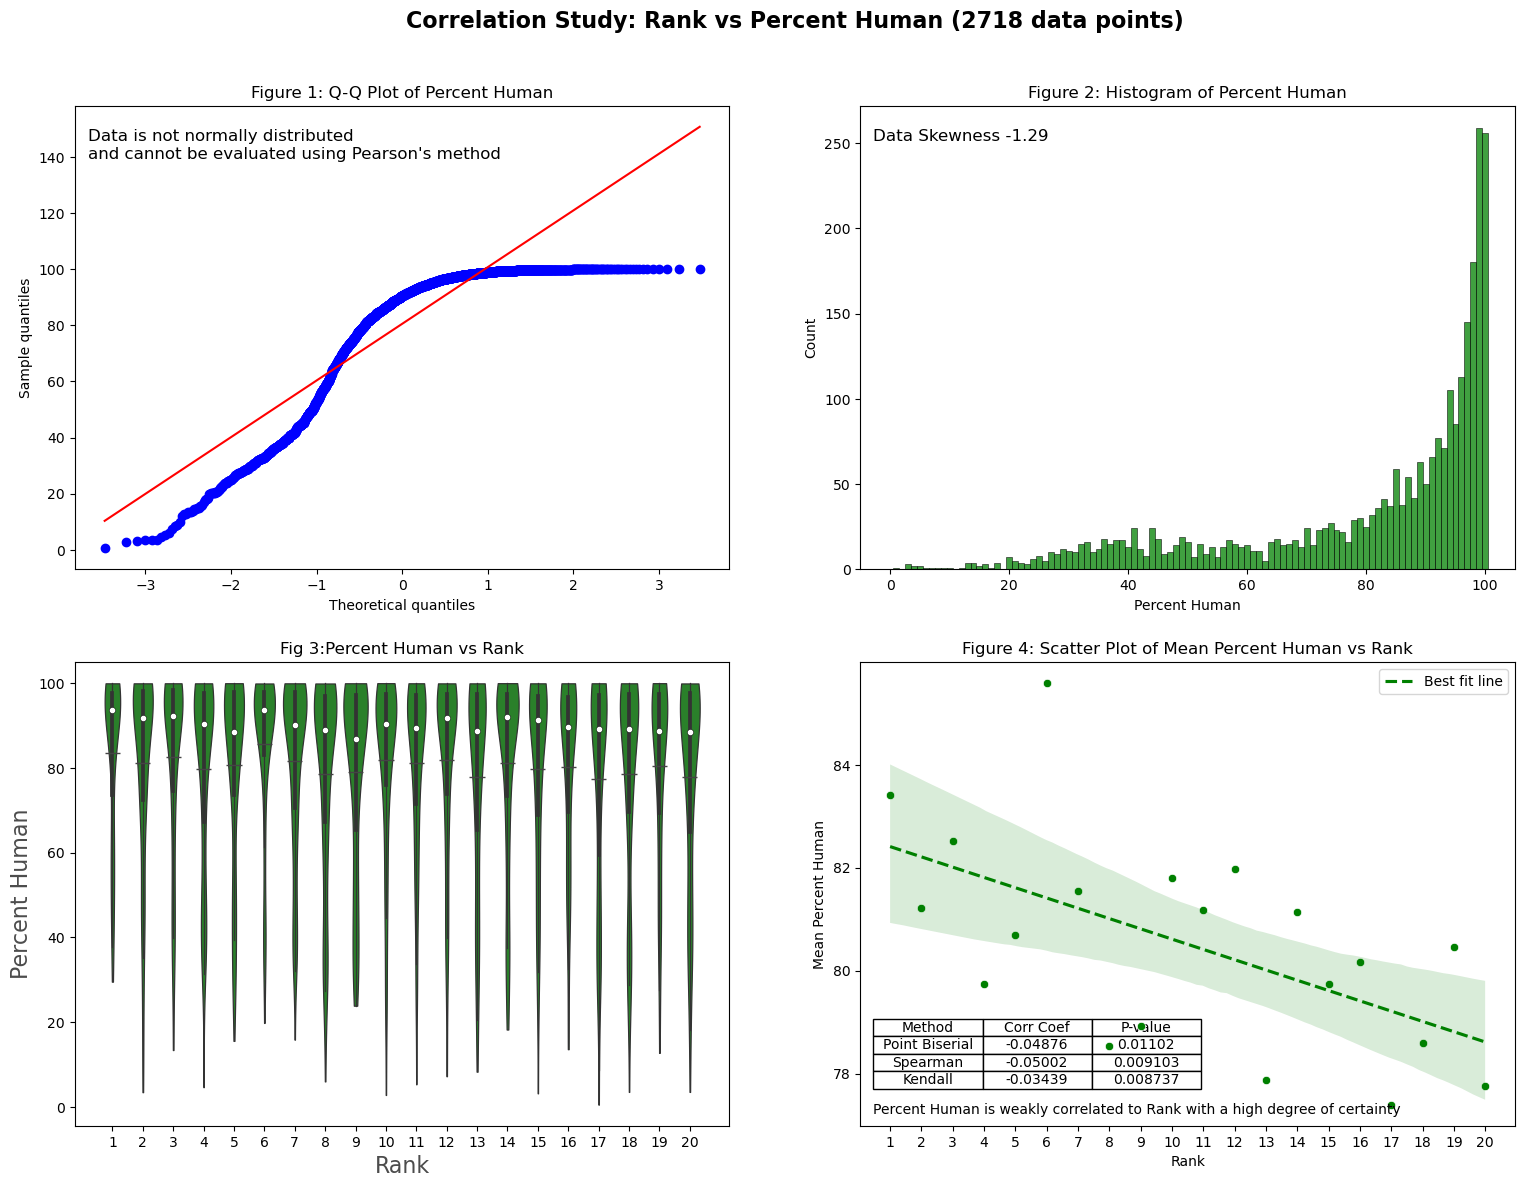

In [42]:
df_wc_2000 = df[df['word_count']>= 2000]
multiplot2(df_wc_2000)

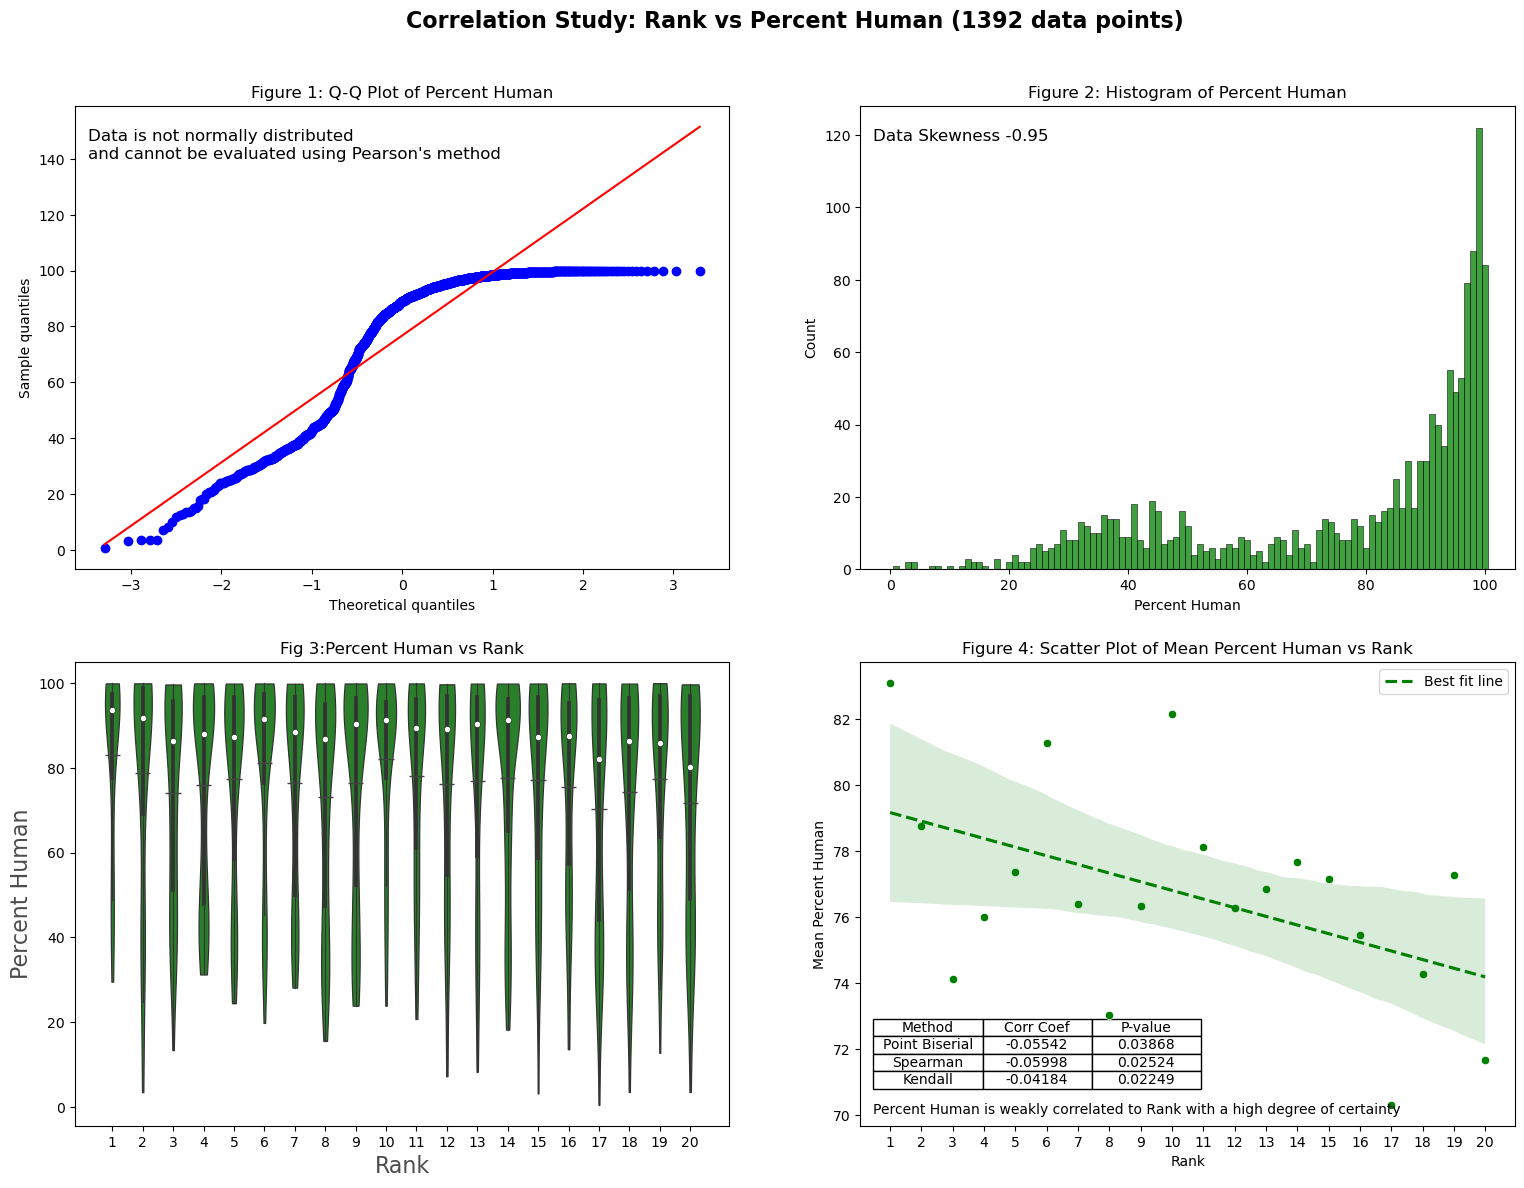

In [43]:
df_wc_3000 = df[df['word_count']>= 3000]
multiplot2(df_wc_3000)

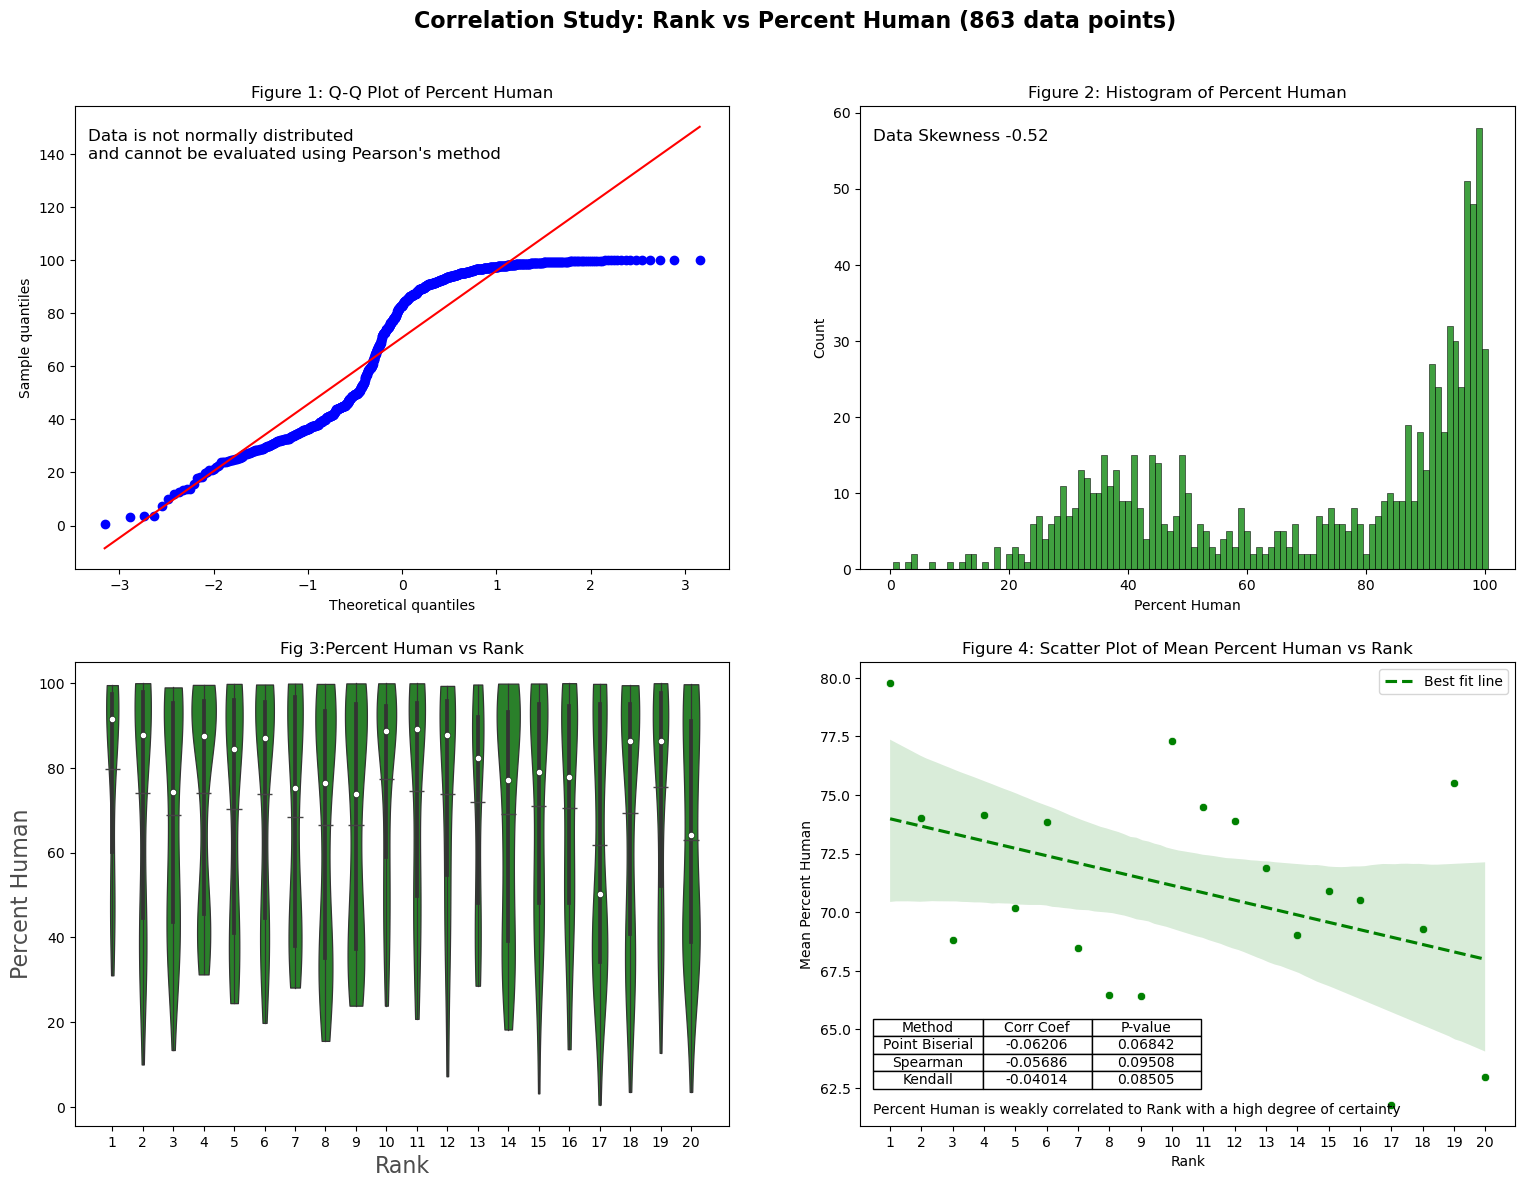

In [44]:
df_wc_4000 = df[df['word_count']>= 4000]
multiplot2(df_wc_4000)

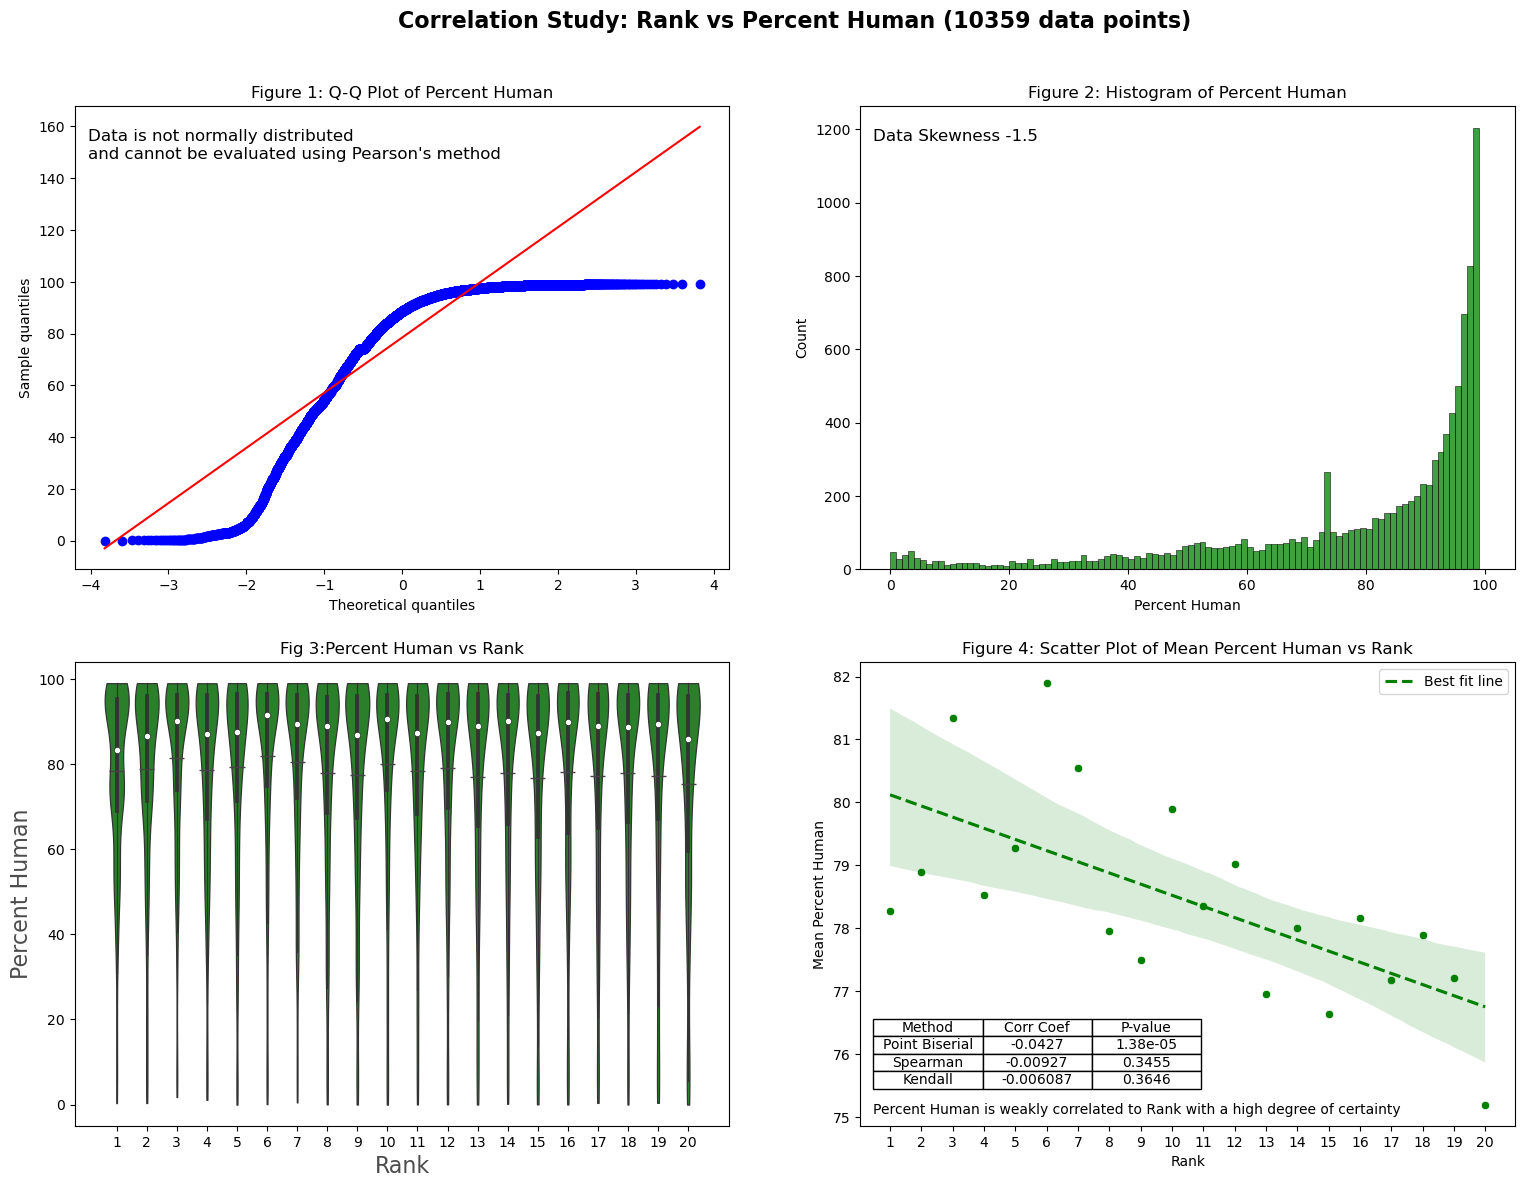

In [45]:
df_ph_less_99 = df[df['percent_human']<= 99]
multiplot2(df_ph_less_99)

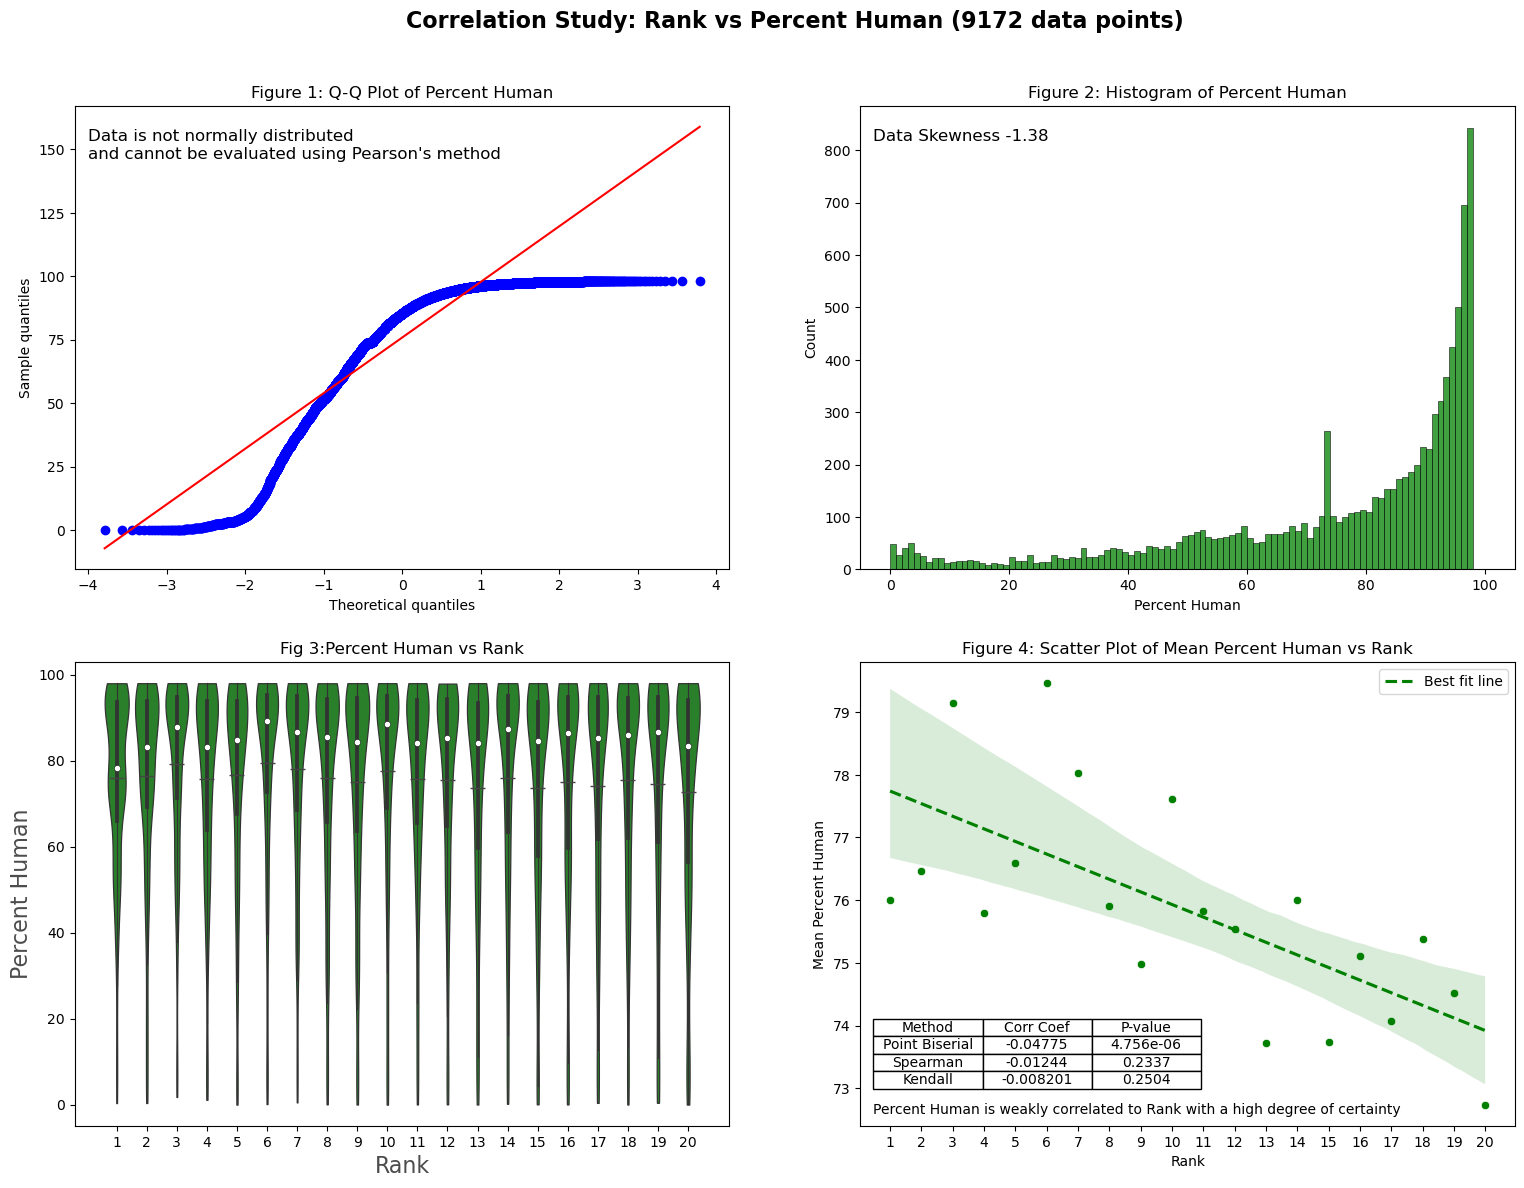

In [46]:
df_ph_less_98 = df[df['percent_human']<= 98]
multiplot2(df_ph_less_98)

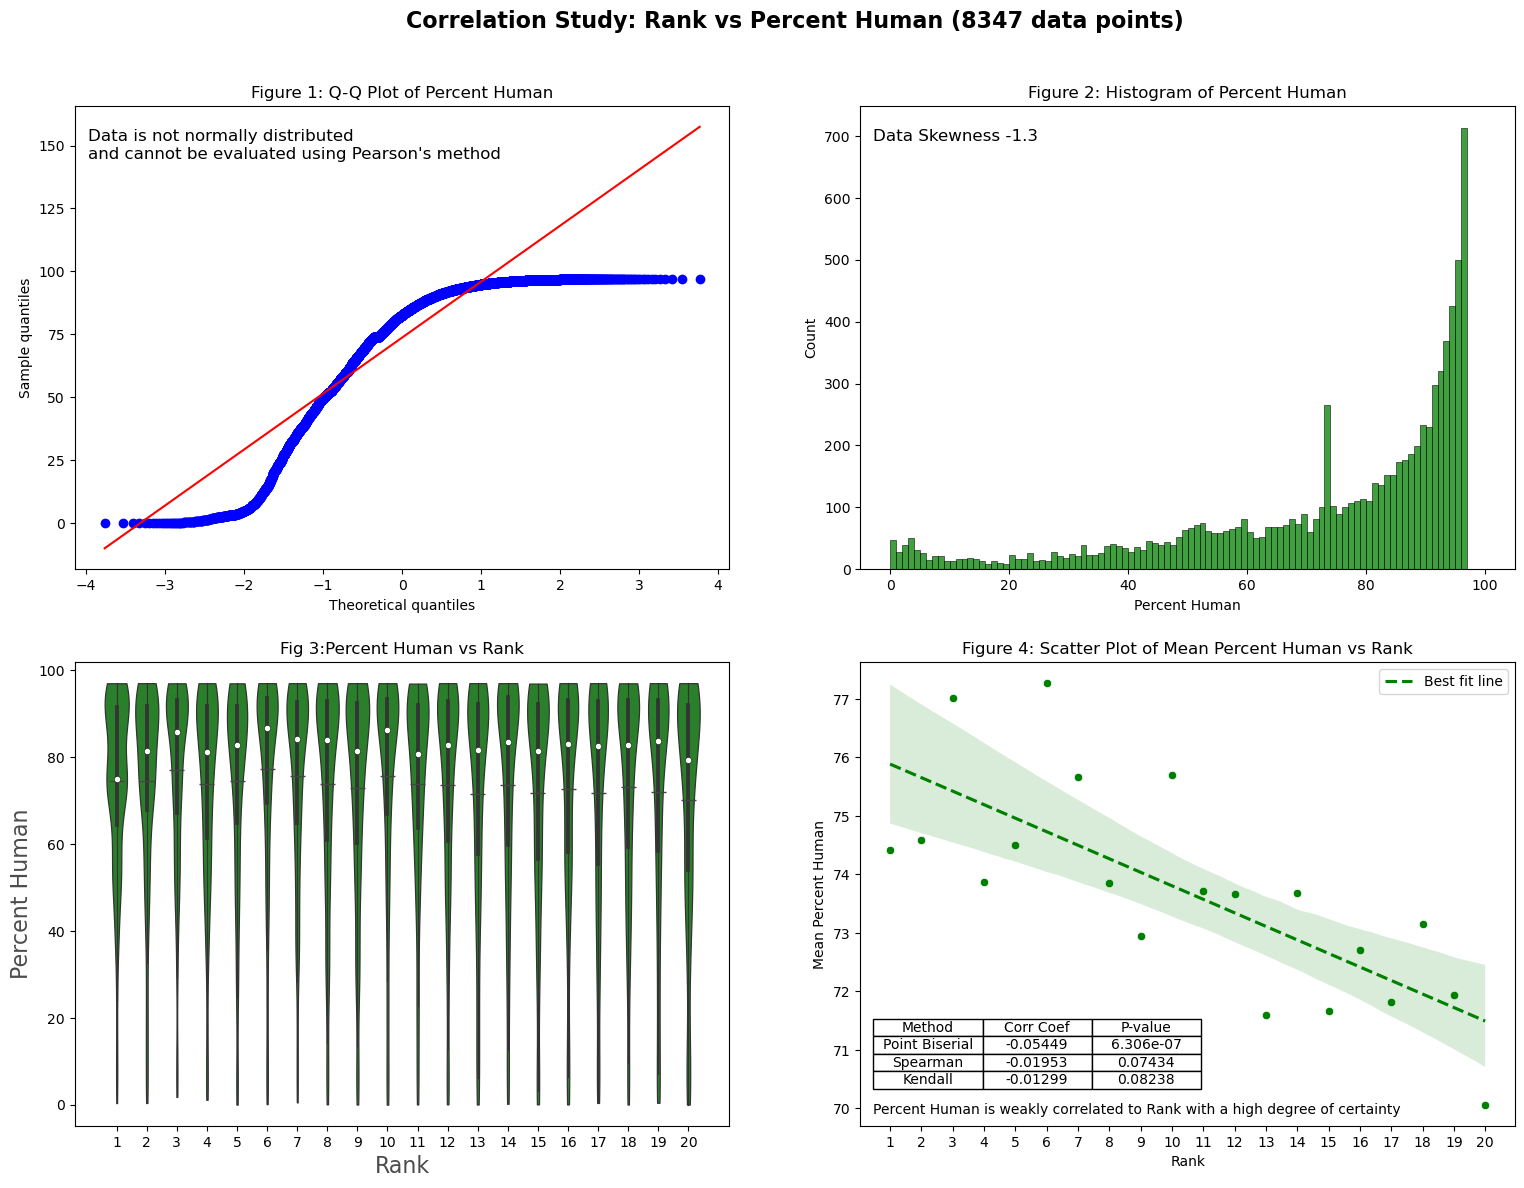

In [47]:
df_ph_less_97 = df[df['percent_human']<= 97]
multiplot2(df_ph_less_97)

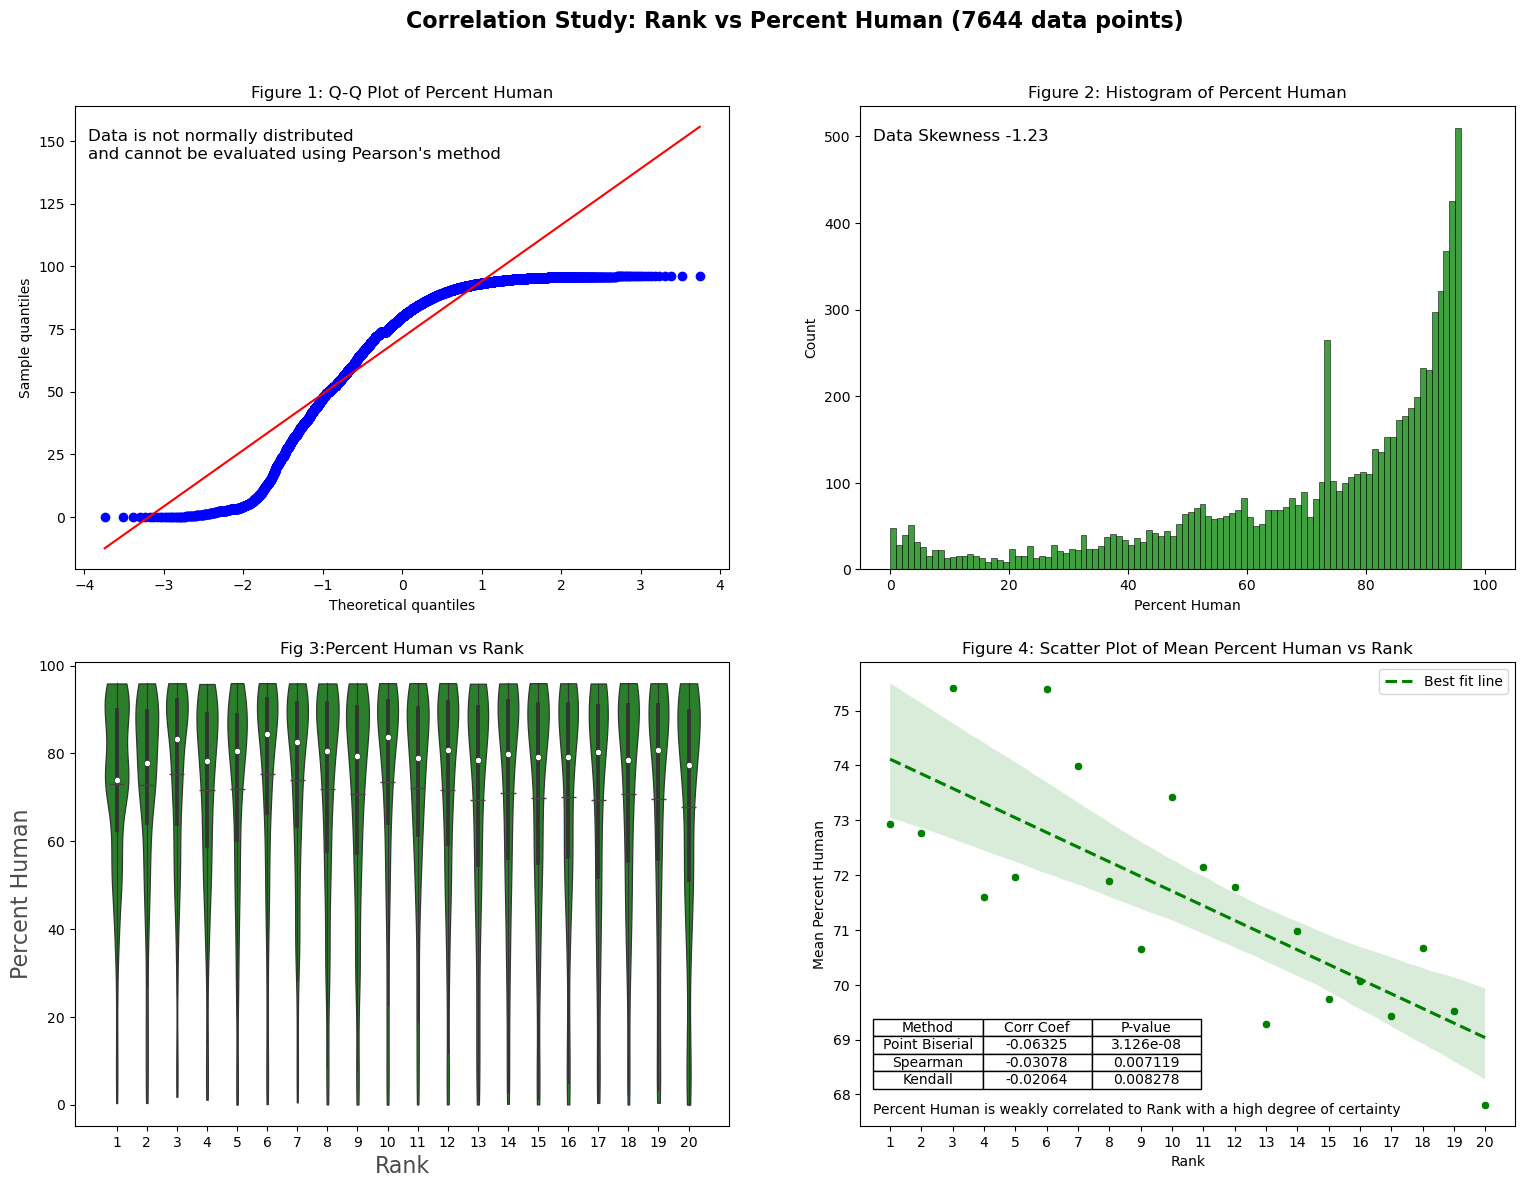

In [48]:
df_ph_less_96 = df[df['percent_human']<= 96]
multiplot2(df_ph_less_96)

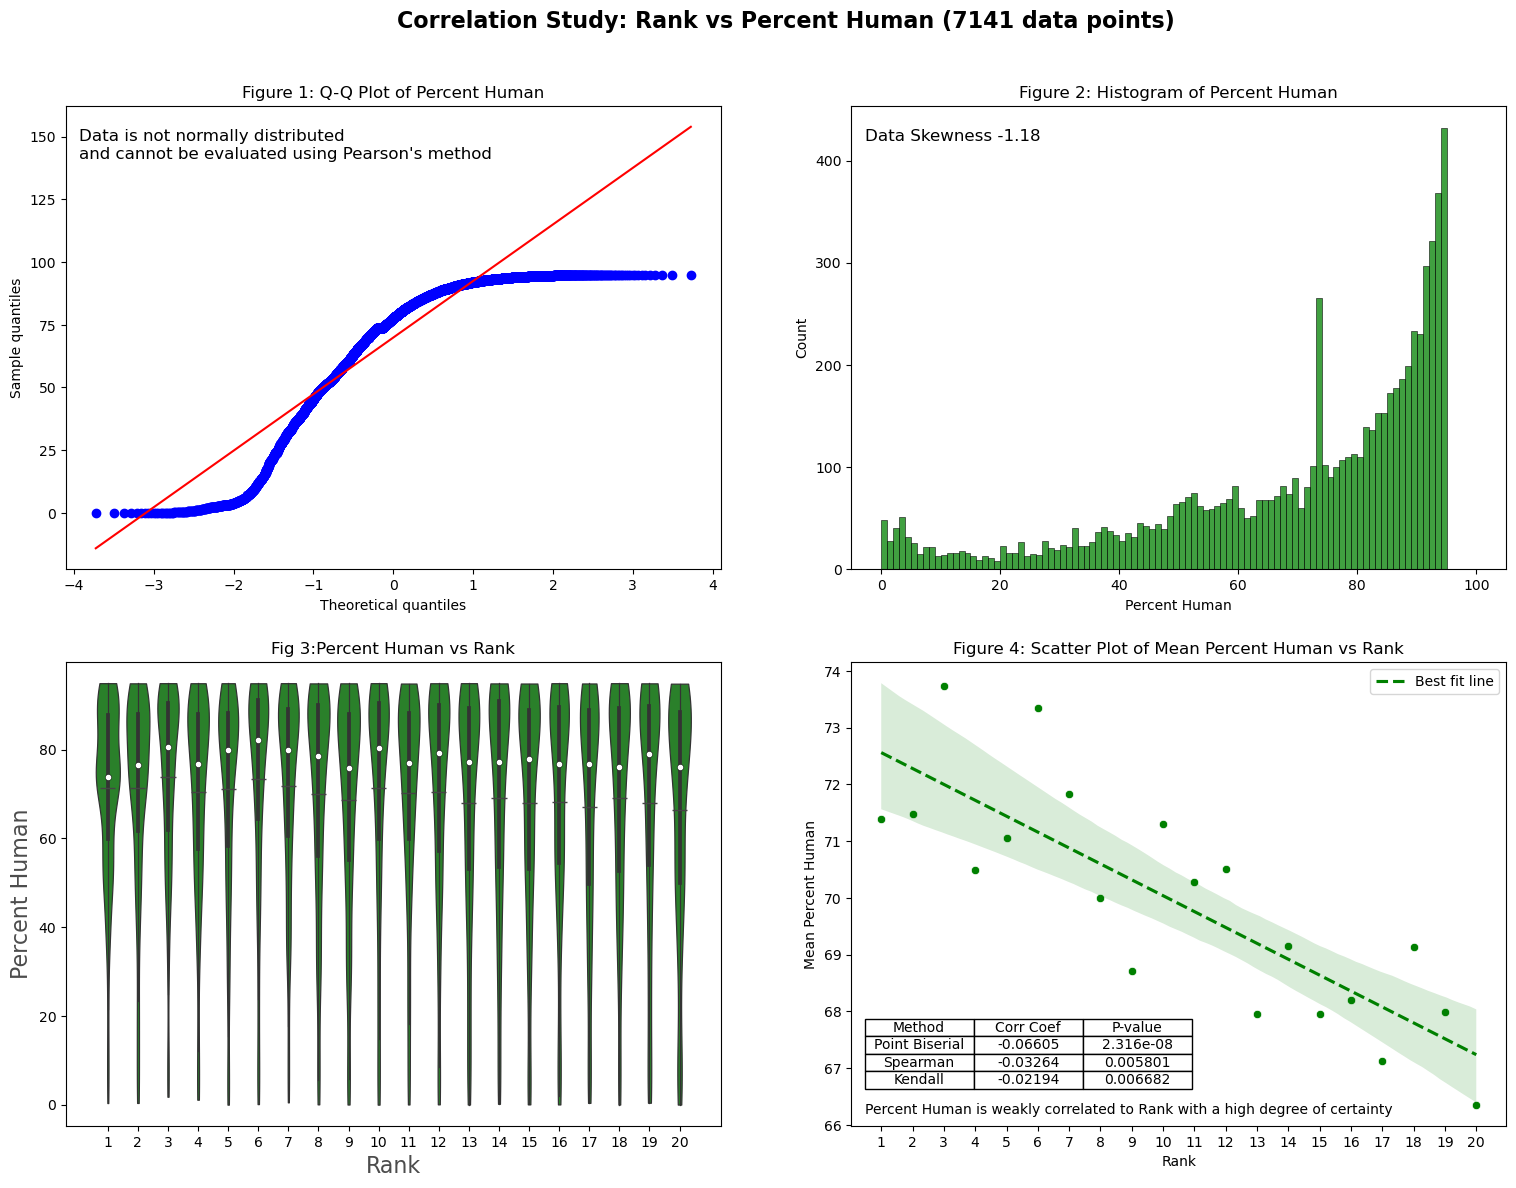

In [49]:
df_ph_less_95 = df[df['percent_human']<= 95]
multiplot2(df_ph_less_95)

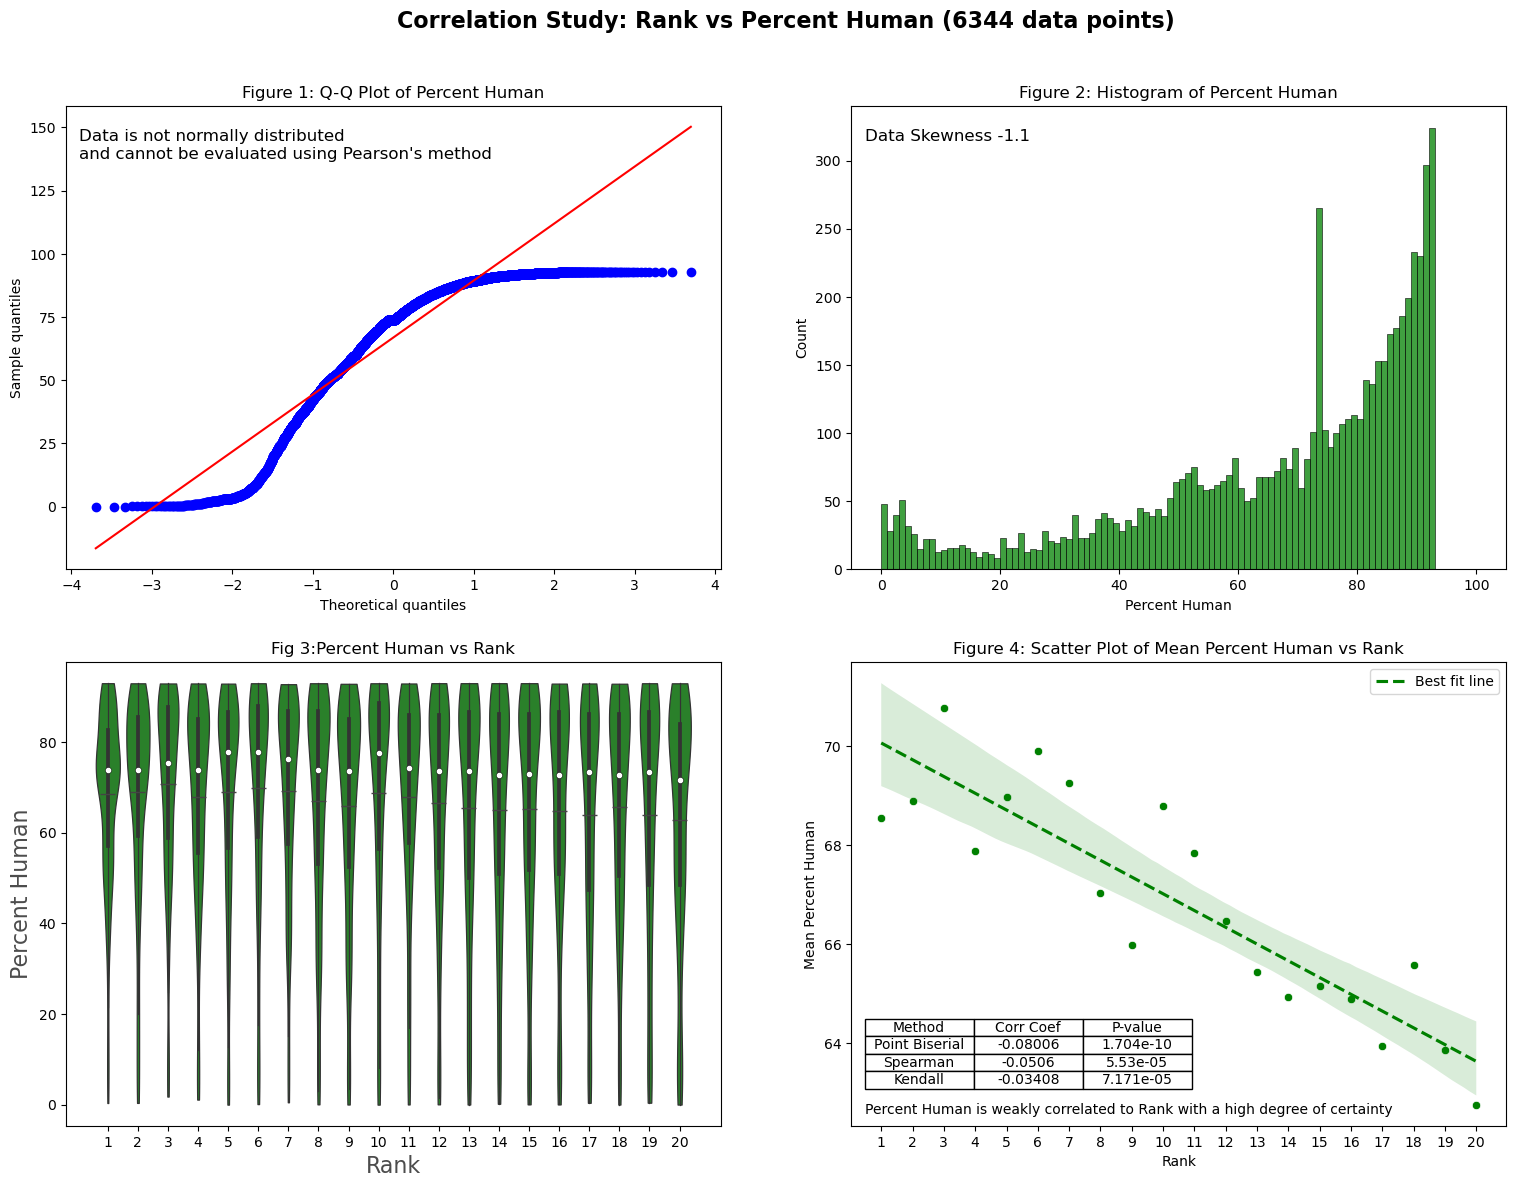

In [50]:
df_ph_less_93 = df[df['percent_human']<= 93]
multiplot2(df_ph_less_93)

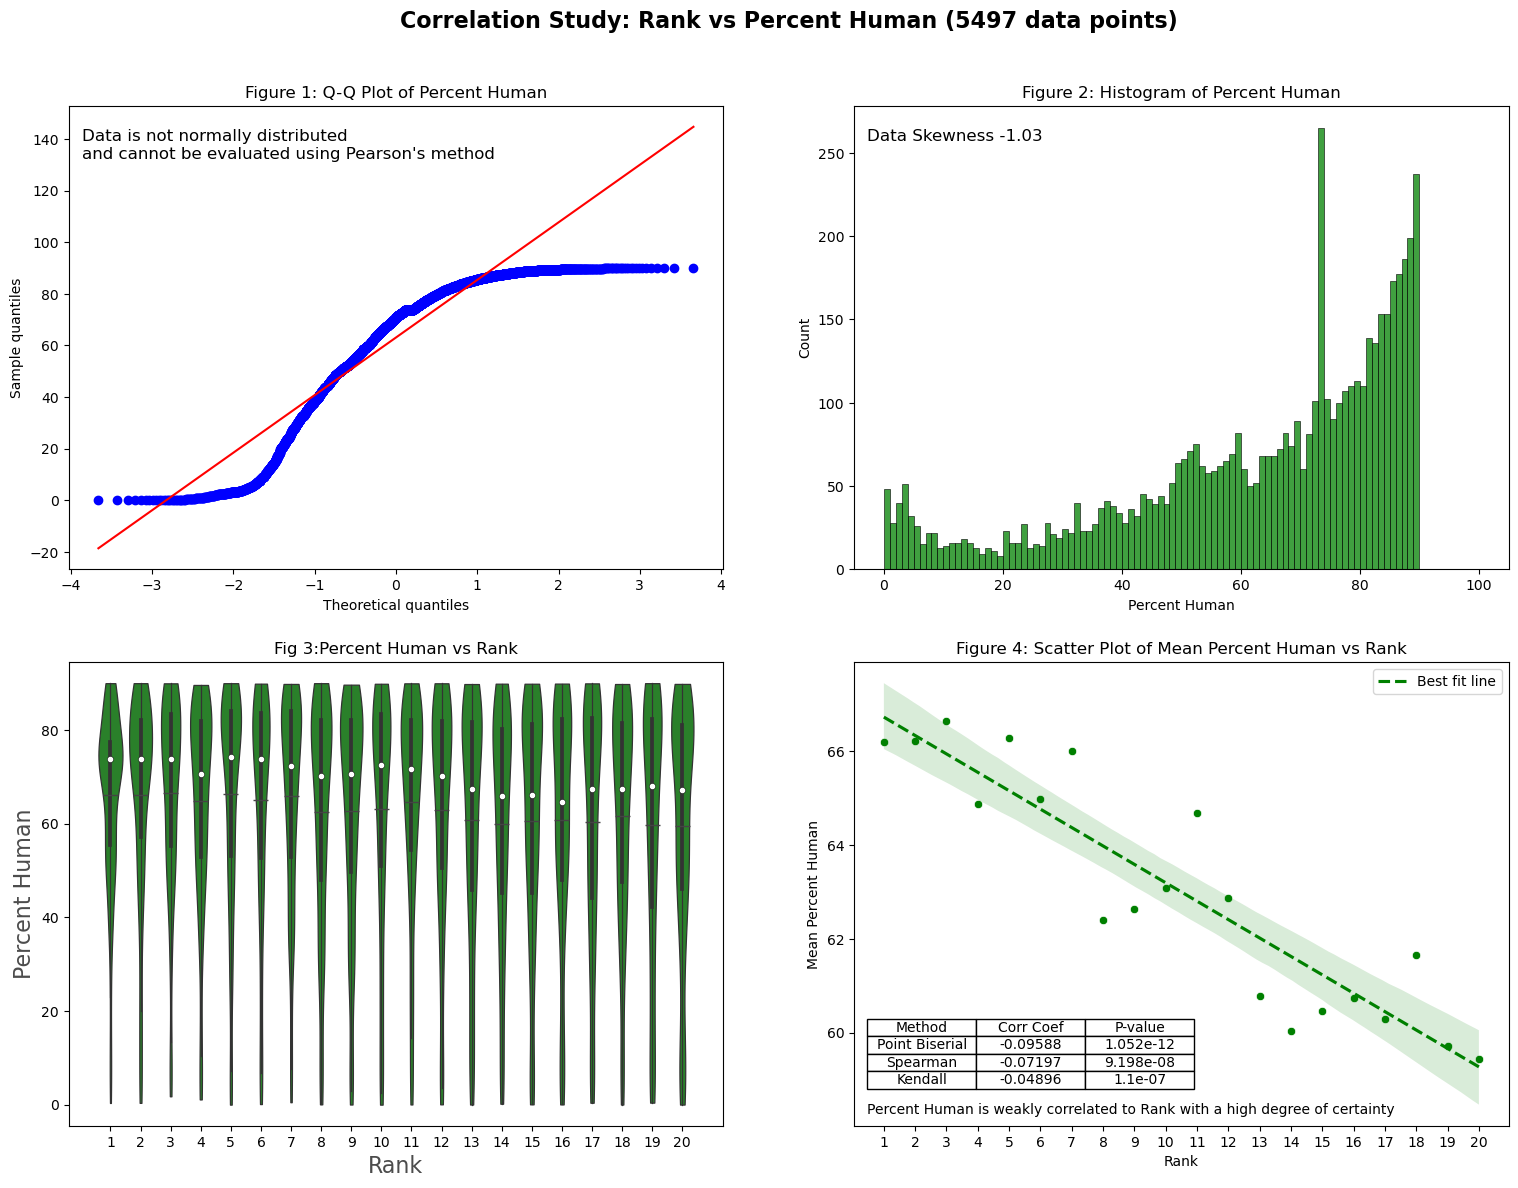

In [51]:
df_ph_less_90 = df[df['percent_human']<= 90]
multiplot2(df_ph_less_90)

In [52]:
# try cube roots

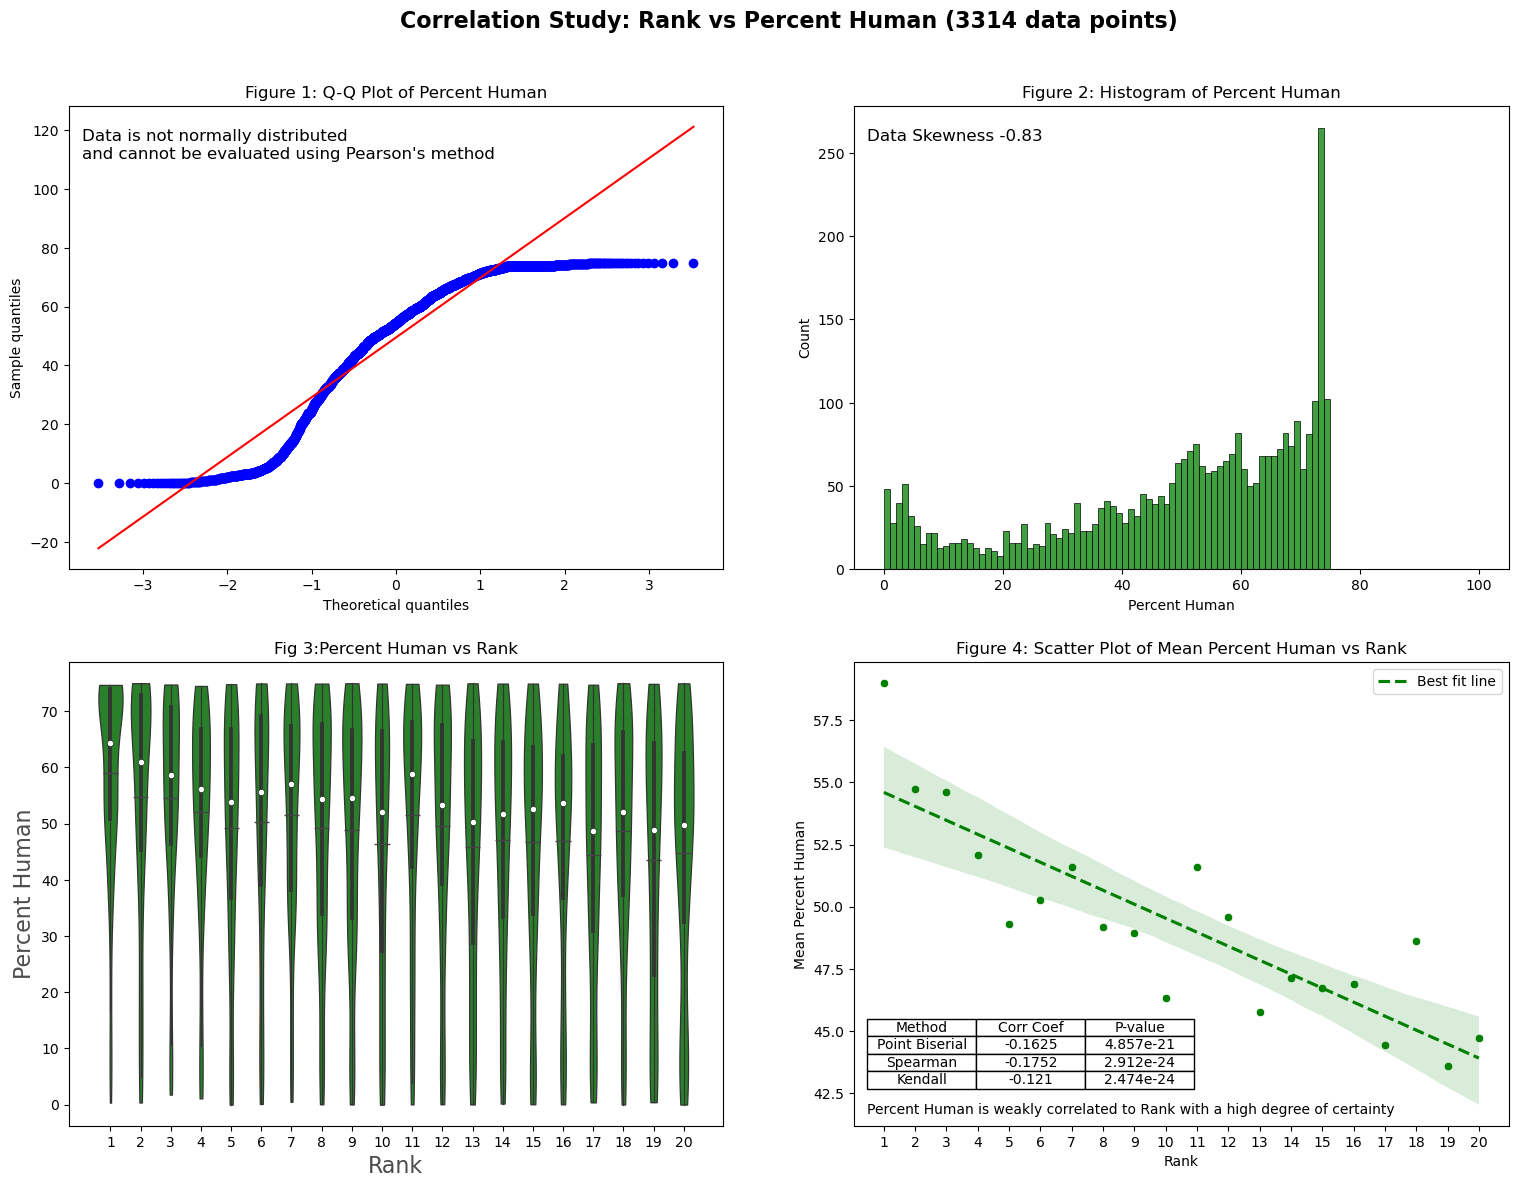

In [53]:
df_ph_less_80 = df[df['percent_human']<= 75]
multiplot2(df_ph_less_80)

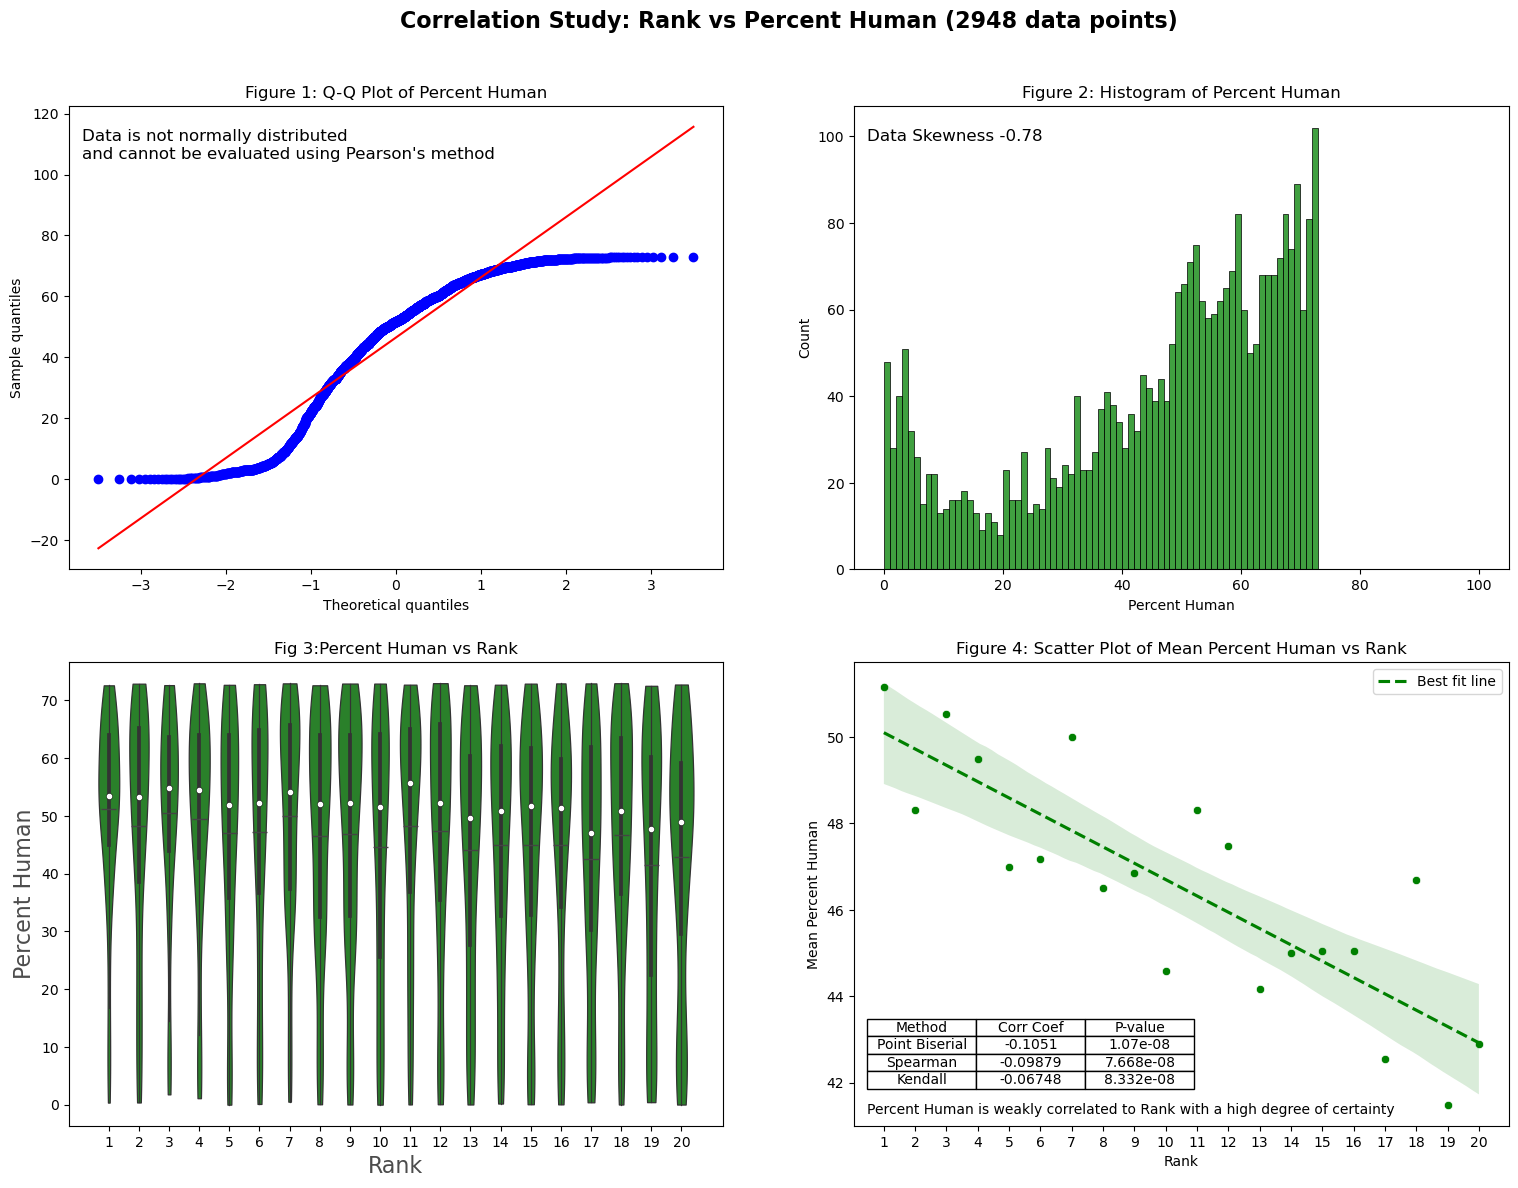

In [54]:
df_ph_less_80 = df[df['percent_human']<= 73]
multiplot2(df_ph_less_80)

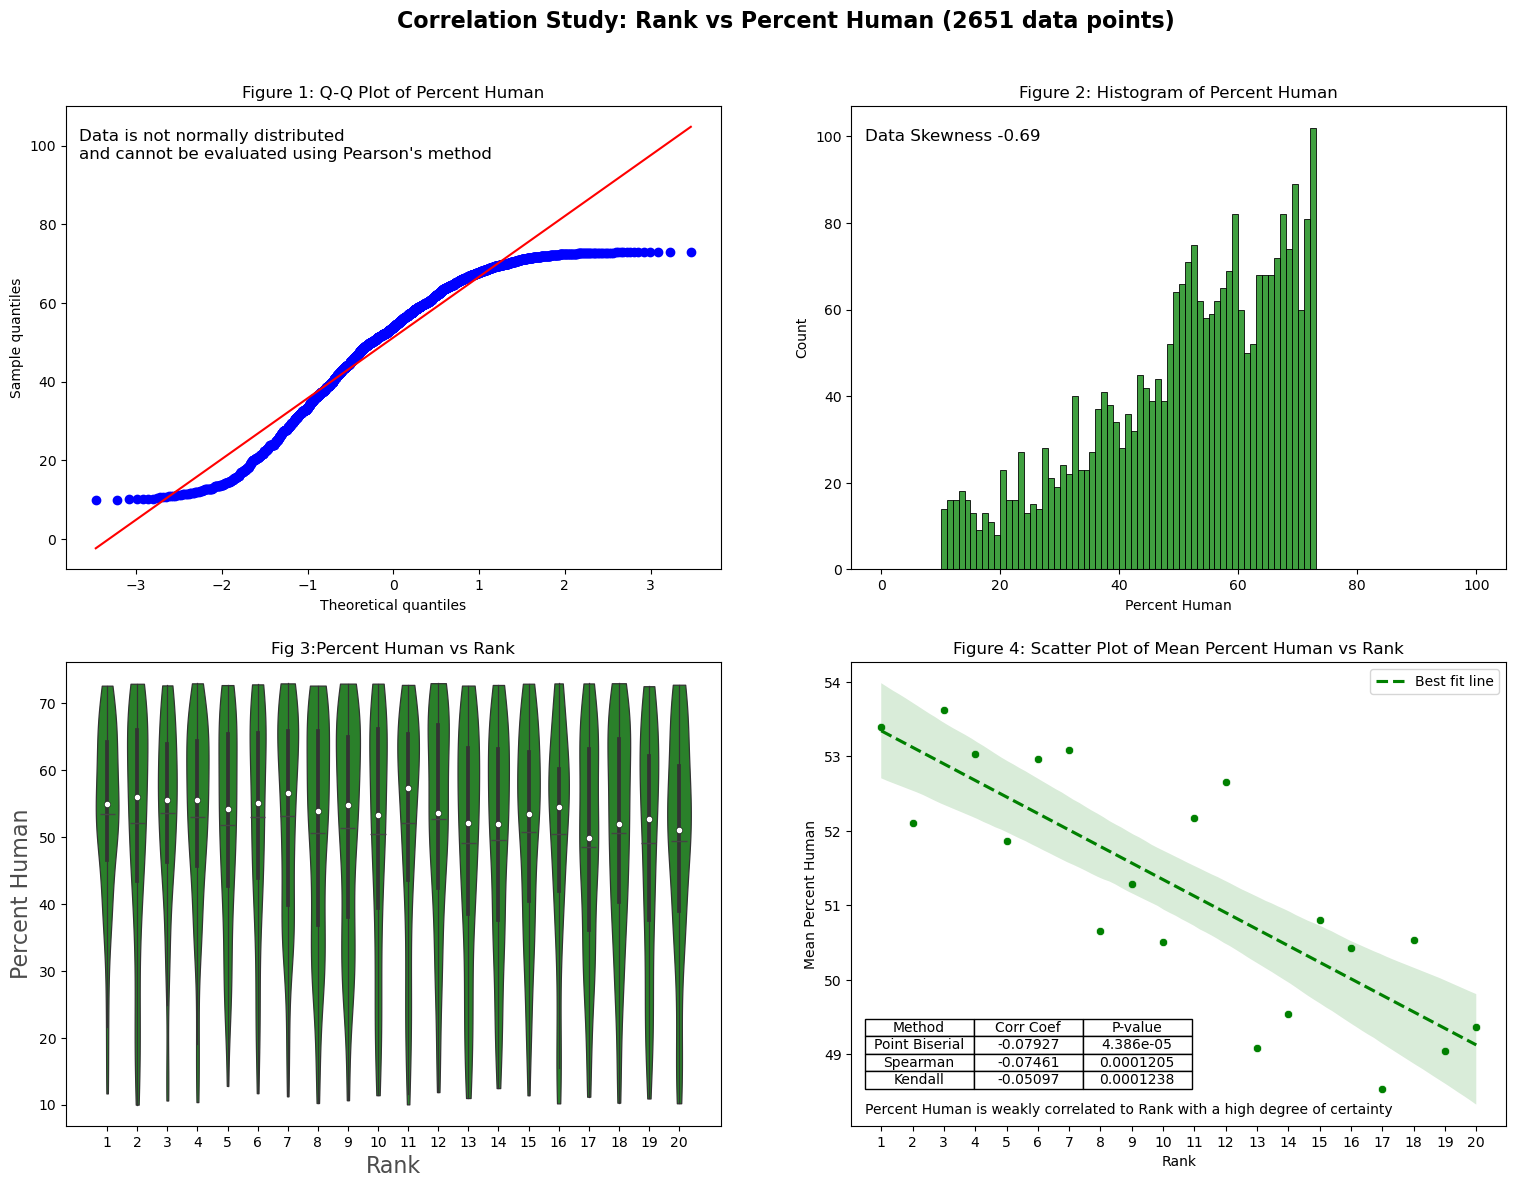

In [55]:
#df_mid_80 = df[(df['percent_human'] < 80) & (df['percent_human'] > 10)]
df_ph_5_73 = df[(df['percent_human']<= 73) & (df['percent_human']>=10)]
multiplot2(df_ph_5_73)

In [28]:
# one hot Encoding